# Проект: Обучение с учителем: качество модели

# Модель машинного обучения для интернет-магазина "В один клик".

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
Поэтому нам необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


**Цель исследования:**
1. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца;
2. Включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца;
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.



**Ход исследования**

Данные получим из файлов `market_file.csv`,`market_money.csv`, `money.csv`, `market_time.csv`, просмотрим общую информацию о датасете, оценим качество данных.

Далее приступим к предобработке данных: проверим и исправим ошибки, которые не приведут к искажению конечного результата, оценим их влияние на исследование. 

Затем настанет очередь исследовательского и корреляционного анализа данных.

После этого применим пайплайны для подбора лучшей модели.

Завершающим этапом исследования будет анализ важности признаков и сегментация покупателей.

Таким образом, иследование будет состоять из следующих этапов:

- [Обзор данных](#info)

- [Предобработка данных](#preprocessing)

- [Исследовательский анализ данных](#EDA)

- [Объединение таблиц](#merge)

- [Корреляционный анализ](#corr)

- [Использование пайплайнов](#pipeline)

- [Анализ важности признаков](#importance)

- [Сегментация покупателей](#segment)

- [Итоговые выводы](#final)

## Описание данных

Файл **`market_file.csv`** содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении 

| | |
| ------ | ------ | 
| **id** | номер покупателя в корпоративной базе данных | 
| **Покупательская активность** | рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»|
| **Тип сервиса** | уровень сервиса, например «премиум» и «стандарт» |
| **Разрешить сообщать** | информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель |
| **Маркет_актив_6_мес** | среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|**Маркет_актив_тек_мес**|количество маркетинговых коммуникаций в текущем месяце|
|**Длительность**|значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте|
|**Акционные_покупки**|среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев|
|**Популярная_категория**|самая популярная категория товаров у покупателя за последние 6 месяцев|
|**Средний_просмотр_категорий_за_визит**|показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца|
|**Неоплаченные_продукты_штук_квартал**|oбщее число неоплаченных товаров в корзине за последние 3 месяца|
|**Ошибка_сервиса**|число сбоев, которые коснулись покупателя во время посещения сайта|
|**Страниц_за_визит**|среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца|

__________________________________________


Файл **`market_money.csv`** содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

| | |
| ------ | ------ | 
| **id** | номер покупателя в корпоративной базе данных | 
| **Период** | название периода, во время которого зафиксирована выручка|
| **Выручка** | сумма выручки за период

_________________________________________



Файл **`market_time.csv`** содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.

| | |
| ------ | ------ | 
| **id** | номер покупателя в корпоративной базе данных | 
| **Период** | название периода, во время которого зафиксировано общее время|
| **минут** | значение времени, проведённого на сайте, в минутах|


__________________________________________



Файл **`money.csv`** содержит данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

| | |
| ------ | ------ | 
| **id** | номер покупателя в корпоративной базе данных | 
| **Прибыль** | значение прибыли|

### **Общая информация**
<a id='info'></a>

In [1]:
# Импротируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

!pip install -Uq scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler, 
    MinMaxScaler,
    RobustScaler
)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Зафиксируем случайность  и размер тестовой выборки
RANDOM_STATE = 42
TEST_SIZE = 0.25

!pip install phik -q
import phik

!pip install shap -q
import shap



# Подавление FutureWarnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

sklearn.__version__

'1.7.2'

In [2]:
market_file = pd.read_csv('market_file.csv')
market_money = pd.read_csv('market_money.csv')
market_time = pd.read_csv('market_time.csv')
money = pd.read_csv('money.csv', sep=';', decimal=',')

In [3]:
#создаем функцию для получения общей информации
def general_info(df):
    return display(df.shape, df.head(), df.info())

In [4]:
# Посмотрим на первые 5 строк каждого датасета и общую информацию
general_info(market_file)
general_info(market_money)
general_info(market_time)
general_info(money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

(1300, 13)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


(3900, 3)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


(2600, 3)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


(1300, 2)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


None

**`market_file.csv`** содержит **1300 строк и 13 столбцов**.

**`market_money.csv`** содержит **3900 строк и 3 столбца**.

**`market_time.csv`** содержит **2600 строк и 3 столбца**.

**`money.csv`** содержит **1300 строк и 2 столбца**.

В данных присутствуют неправильные названия столбцов, пропуски отсутствуют, типы данных корректны.

### **Предобработка данных**
<a id='preprocessing'></a>

#### **Переименование столбцов**

In [5]:
# Выводим названия столбцов
display(market_file.columns, market_money.columns, market_time.columns, money.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Index(['id', 'Период', 'Выручка'], dtype='object')

Index(['id', 'Период', 'минут'], dtype='object')

Index(['id', 'Прибыль'], dtype='object')

In [6]:
# Напишем функцию, которая приводит названия к змеиному регистру
def snake_reg(df):
    df.columns = (df.columns
    .str.lower()
    .str.replace(' ','_')
)
    return df.columns

In [7]:
# Применение функции и проверка результатов - перечень названий столбцов
display(snake_reg(market_file),snake_reg(market_money),snake_reg(market_time), snake_reg(money))

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

Index(['id', 'прибыль'], dtype='object')

**Вывод:** Таким образом, мы переименовали столбцы датафреймов, и теперь все названия в змеином регистре.

#### **Явные и неявные дубликаты**

Проверим количество **неявных** дубликатов в данных.

In [8]:
# Напишем функцию для уникальных значений категориальных столбцов
def cat_unique(df):
    columns = df.select_dtypes(exclude='number').columns.to_list()
    for col in columns:
         display(col, df[col].unique())

In [9]:
# Выведем уникальные значения категориальных столбцов 
cat_unique(market_file)
cat_unique(market_money)
cat_unique(market_time)

'покупательская_активность'

array(['Снизилась', 'Прежний уровень'], dtype=object)

'тип_сервиса'

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

'разрешить_сообщать'

array(['да', 'нет'], dtype=object)

'популярная_категория'

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

'период'

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

'период'

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Приведем неявные дубликаты к общему названию, исправим опечатки.

In [10]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_file['популярная_категория'] = market_file['популярная_категория'].replace('Косметика и аксесуары', 'Косметика и аксесcуары')
market_time['период'] = market_time['период'].replace('предыдцщий_месяц','предыдущий_месяц')

In [11]:
# Проверка
display(market_file['тип_сервиса'].unique(), market_file['популярная_категория'].unique(),
       market_money['период'].unique(), market_time['период'].unique())

array(['премиум', 'стандарт'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесcуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Проверим количество **явных** дубликатов в данных.

In [12]:
display(market_file.drop('покупательская_активность', axis=1).duplicated().sum(),
        market_money.duplicated().sum(), market_time.duplicated().sum(), money.duplicated().sum())

0

0

0

0

Явные дубликаты не обнаружены.

**Вывод:** таким образом, неявные дубликаты были обнаружены и устранены, а явные не найдены.

### **Исследовательский анализ данных**
<a id='EDA'></a>

#### **Статистический анализ количественных признаков**

In [13]:
# Выведем статистики количественных признаков
display(market_file.drop('id', axis=1).describe(),
        market_money.drop('id', axis=1).describe(),
        market_time.drop('id', axis=1).describe(),
        money.drop('id', axis=1).describe())

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


,выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


,прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


В признаке 'выручка' присутствует аномальное значение максимума. Во всех признаках минимальные и максимальные значения соответствуют реальности, среднее несильно отличается от медианы.

In [14]:
# Посмотрим на пользователя с аномальным значением 
market_money[market_money['выручка'] == market_money['выручка'].max()]

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [15]:
# Посмотрим на остальные параметры пользователя
display(market_file[market_file['id'] == 215380], money[money['id'] == 215380], market_time[market_time['id'] == 215380])

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


,id,прибыль
32,215380,3.88


,id,период,минут
64,215380,предыдущий_месяц,12
65,215380,текущий_месяц,14


In [16]:
# Удалим аномальное значение
market_file = market_file.drop(market_file[market_file['id'] == 215380].index)
money = money.drop(money[money['id'] == 215380].index)
market_time = market_time.drop(market_time[market_time['id'] == 215380].index)
market_money = market_money.drop(market_money[market_money['выручка'] == market_money['выручка'].max()].index)

Построим графики для количественных признаков: гистограмму частотности распределения и ящик с усами.

In [17]:
# Определим функцию для построения гистрограммы
def hist_plot(df):
    for col in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(16,7))
        df[col].hist(bins=50)
        plt.grid(True, linestyle='--', color='green', alpha=0.2, which='minor')
        plt.minorticks_on()
        plt.tick_params(which='minor')
        plt.xticks(rotation = 25)
        plt.title(f'Признак {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')
        plt.show()

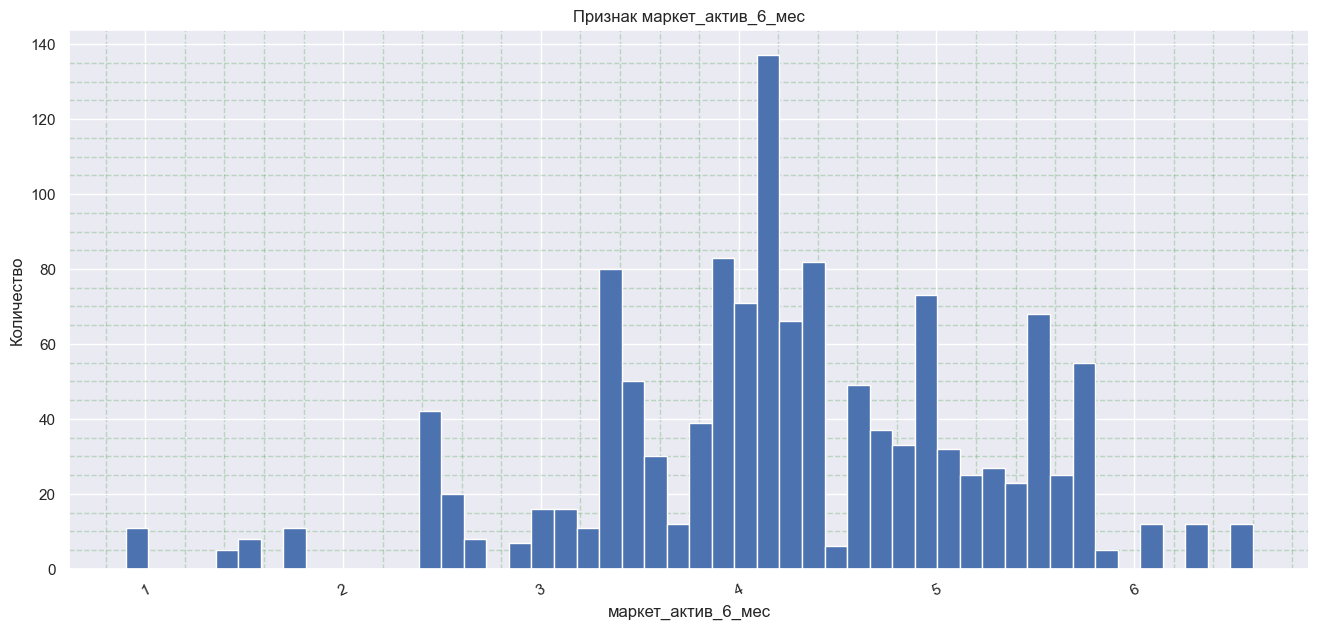

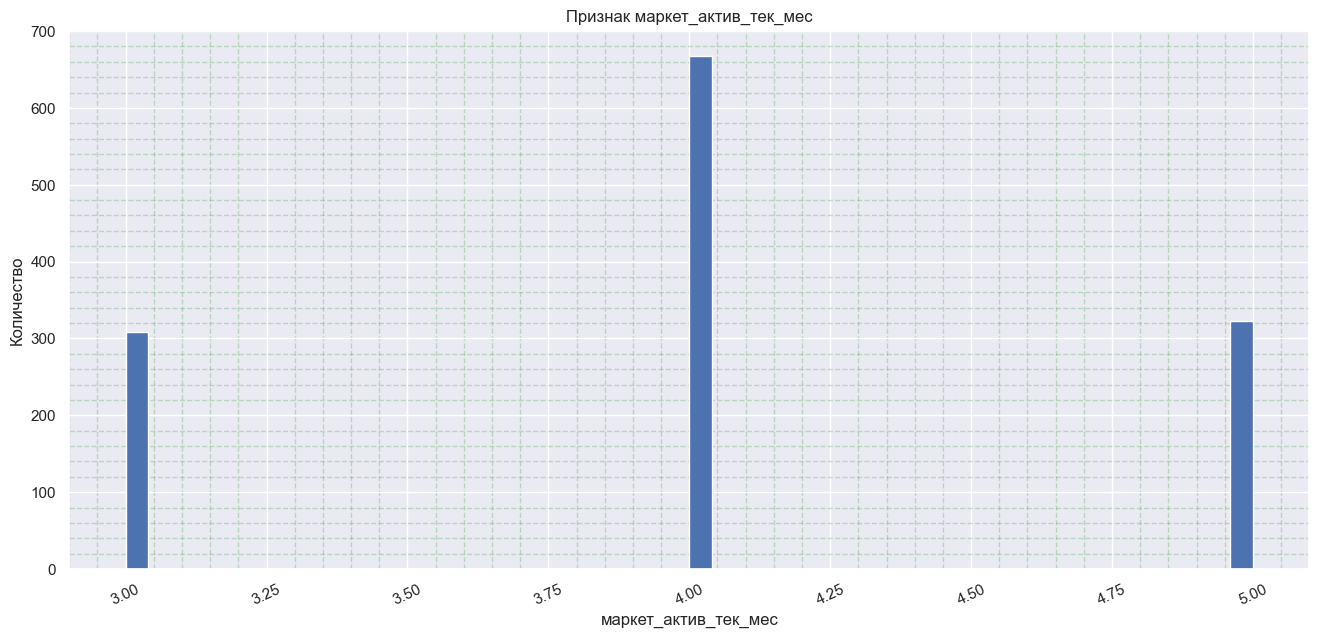

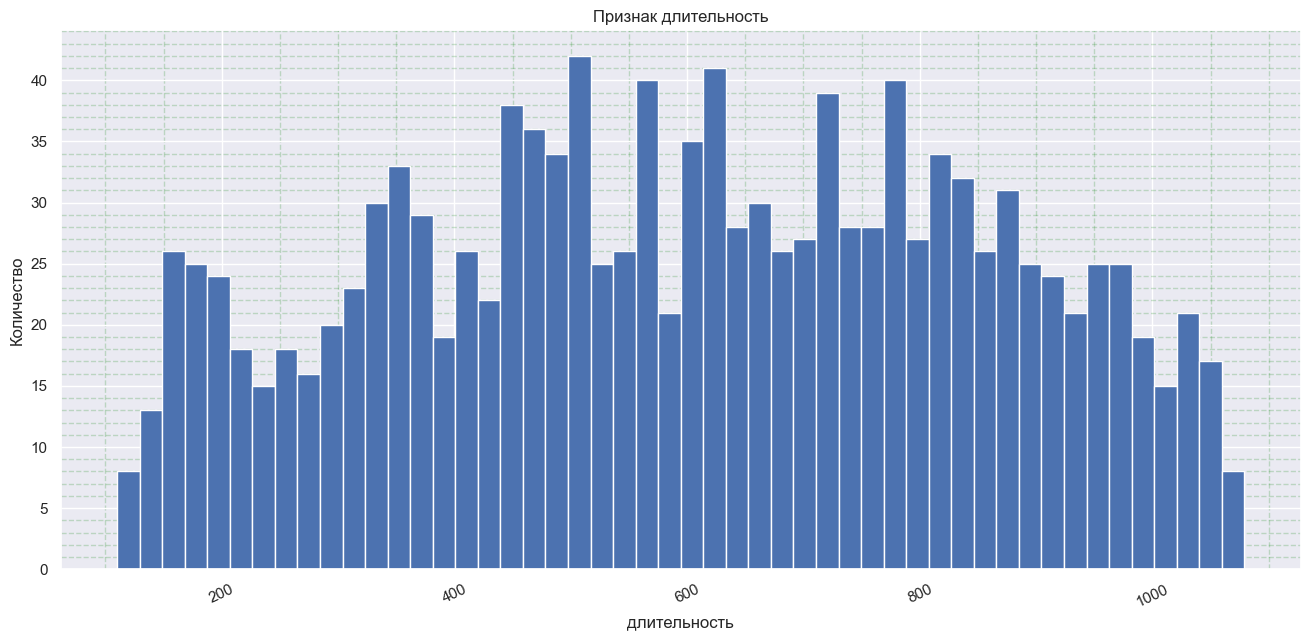

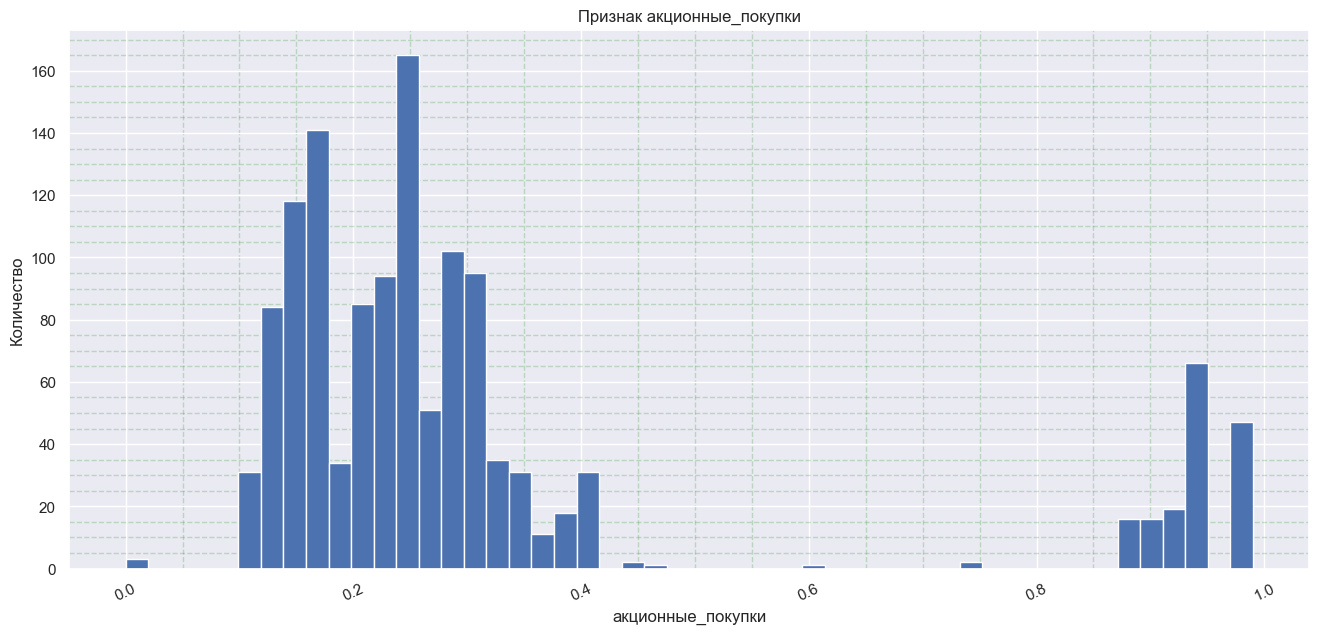

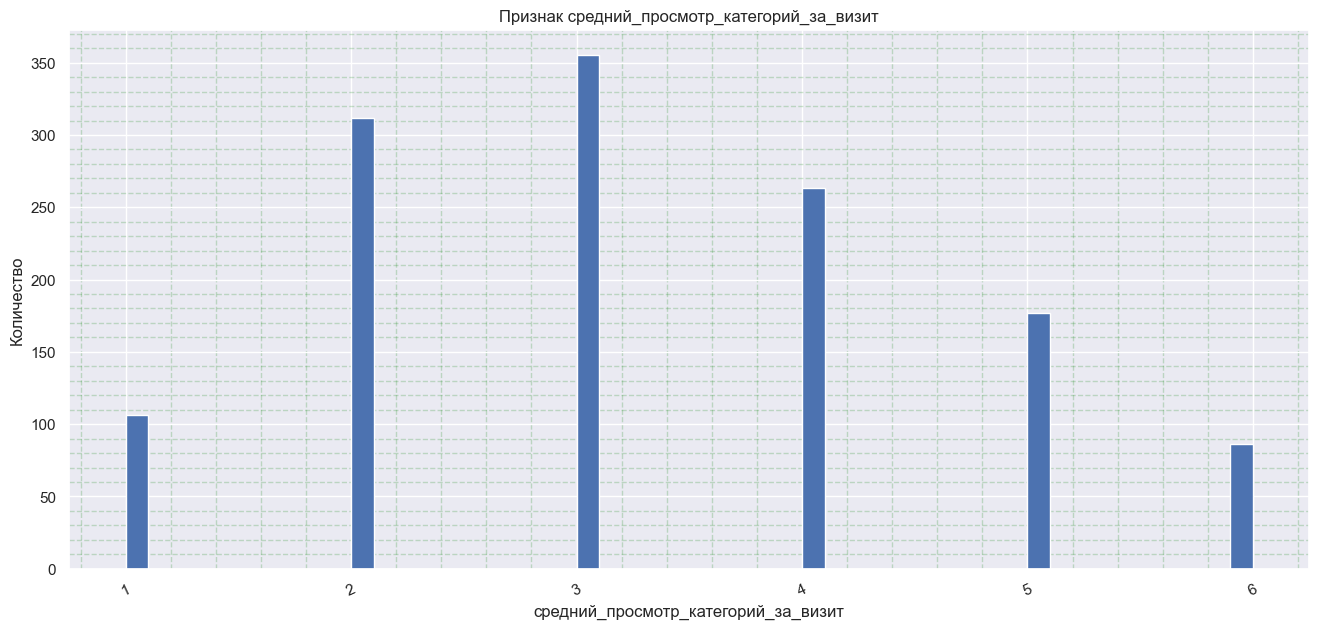

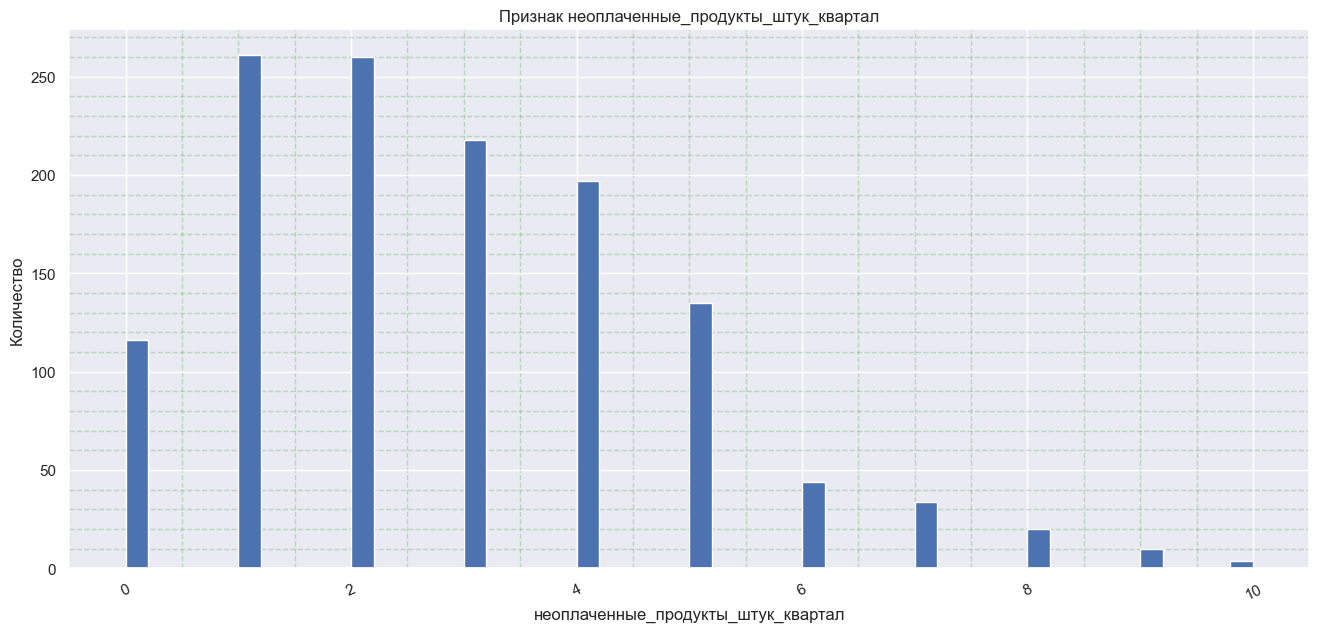

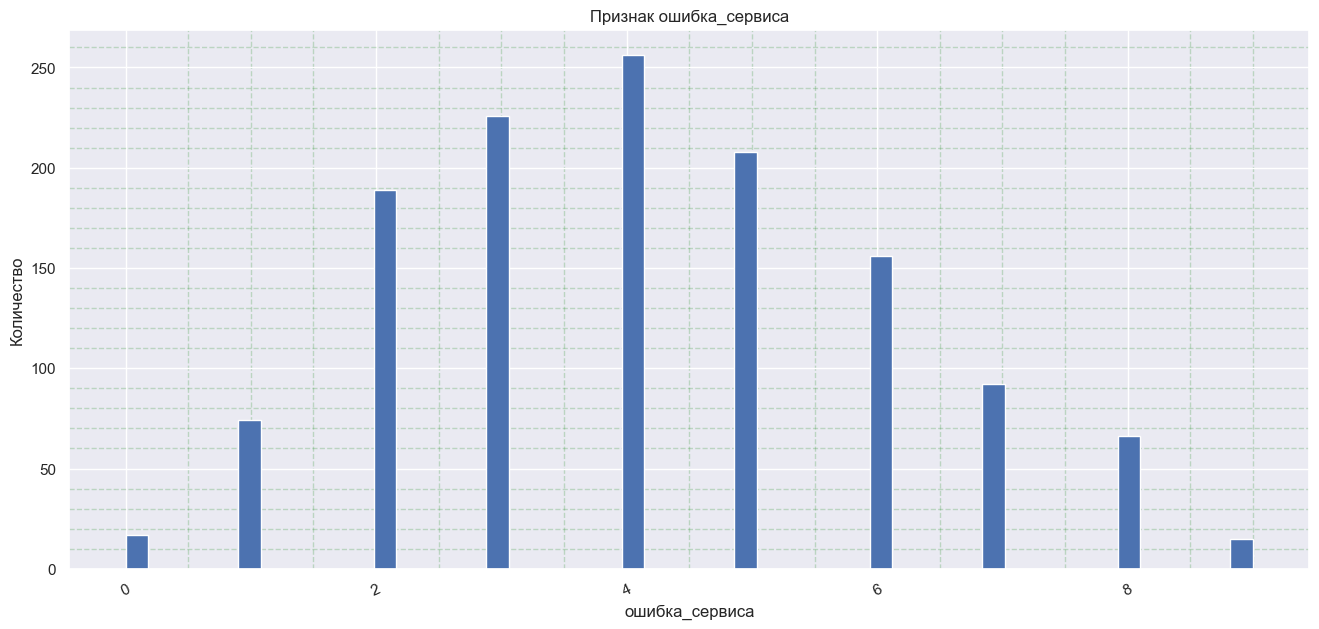

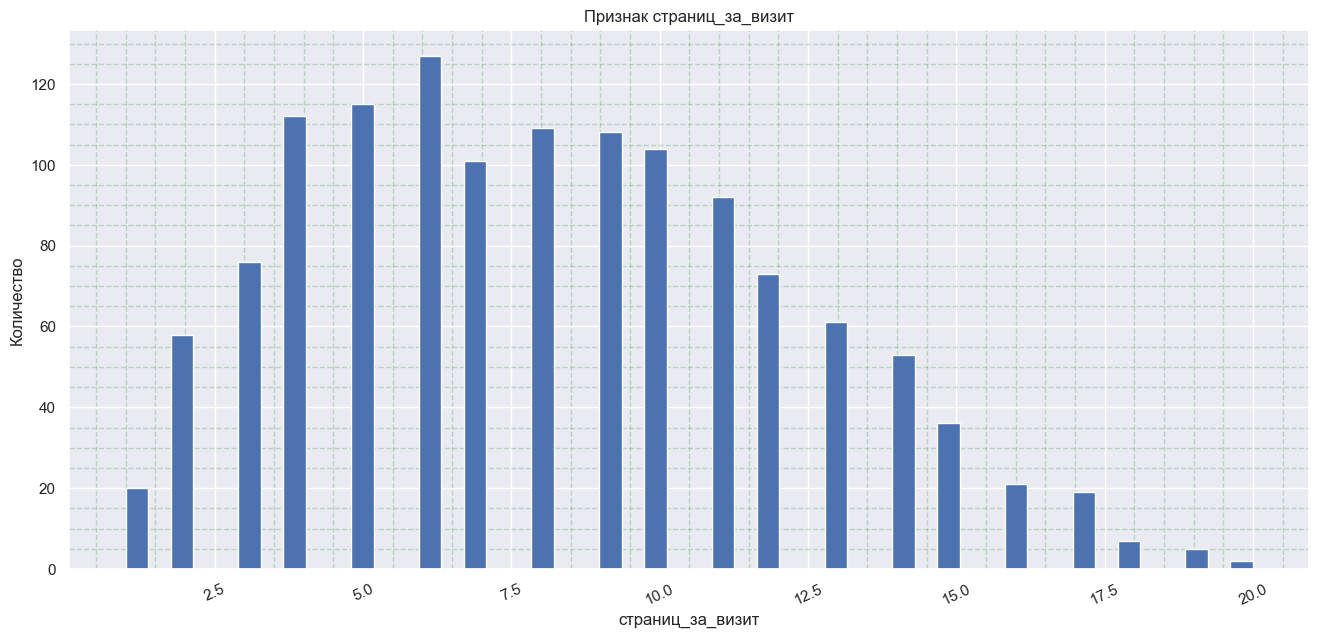

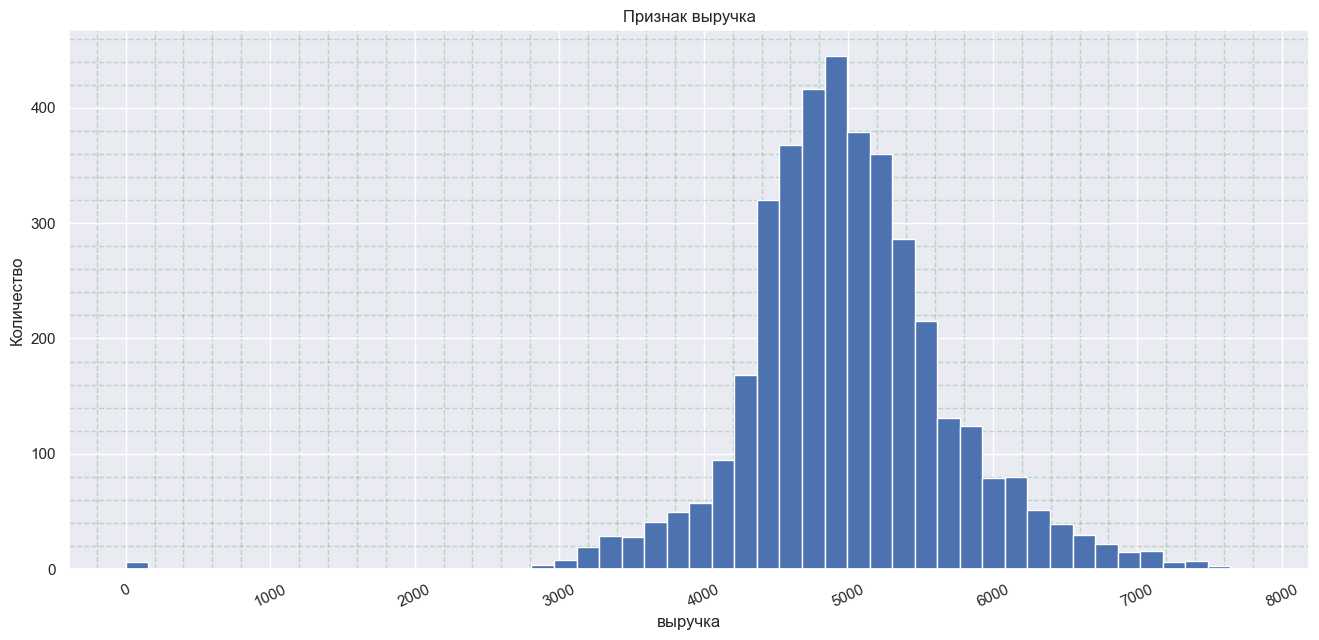

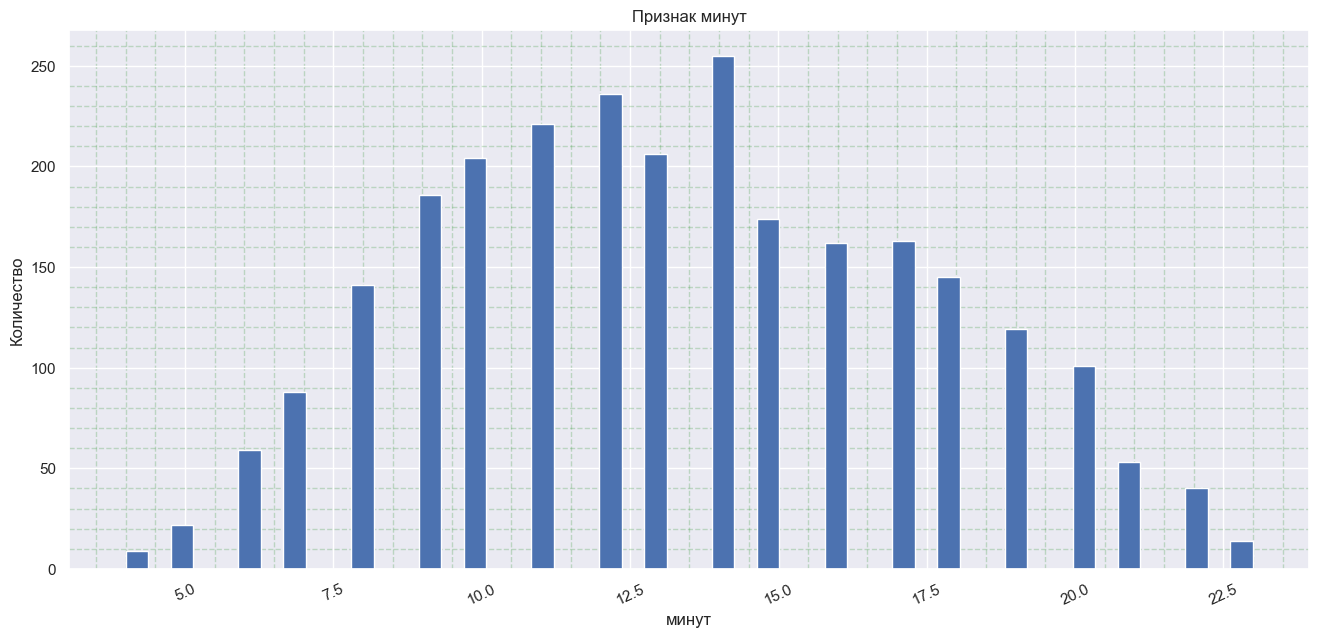

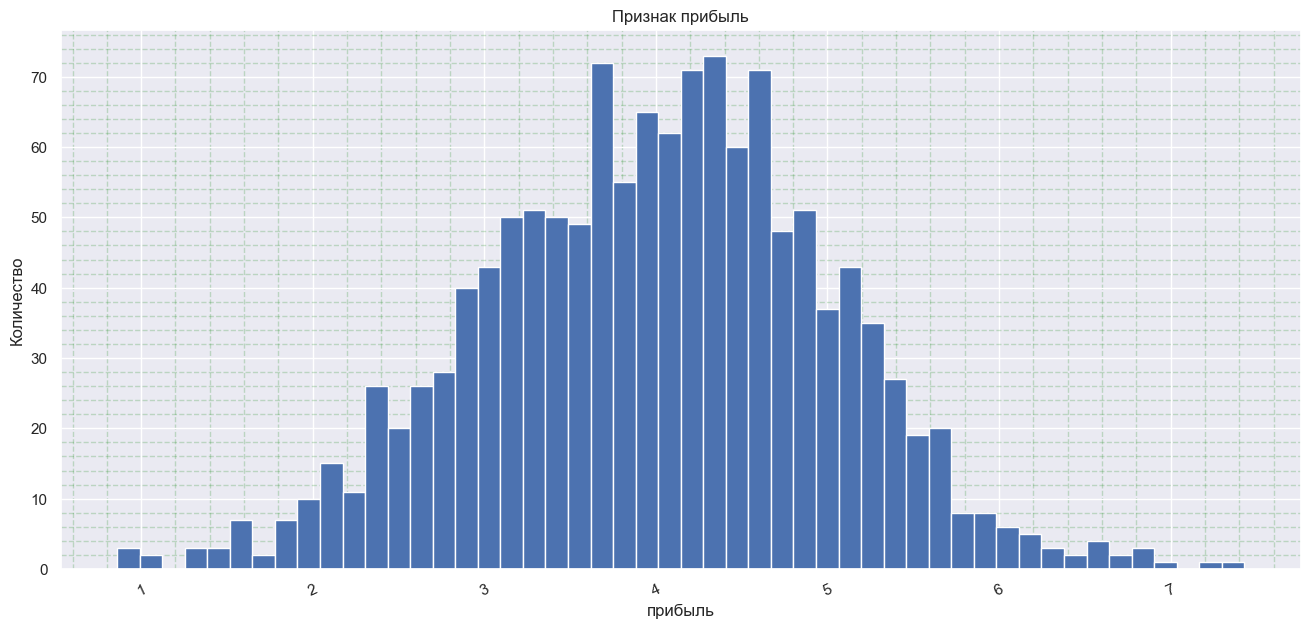

In [18]:
# Строим гистограмму
hist_plot(market_file.drop('id', axis=1))
hist_plot(market_money.drop('id', axis=1))
hist_plot(market_time.drop('id', axis=1))
hist_plot(money.drop('id', axis=1))

Признаки не имеют сильных выбросов и аномалий, однако в `маркет_актив_6_мес`, `акционные_покупки` присутствуют провалы в распределении, что может быть связано с человеческим фактором или особенностью данных.  

Признаки `маркет_актив_6_мес, длительность, выручка, прибыль, акционные_покупки` - непрерывные,

а признаки `минут, страниц_за_визит, ошибка_сервиса, неоплаченные_продукты_штук_квартал, средний_просмотр_категорий_за_визит, маркет_актив_тек_мес` - дискретные.

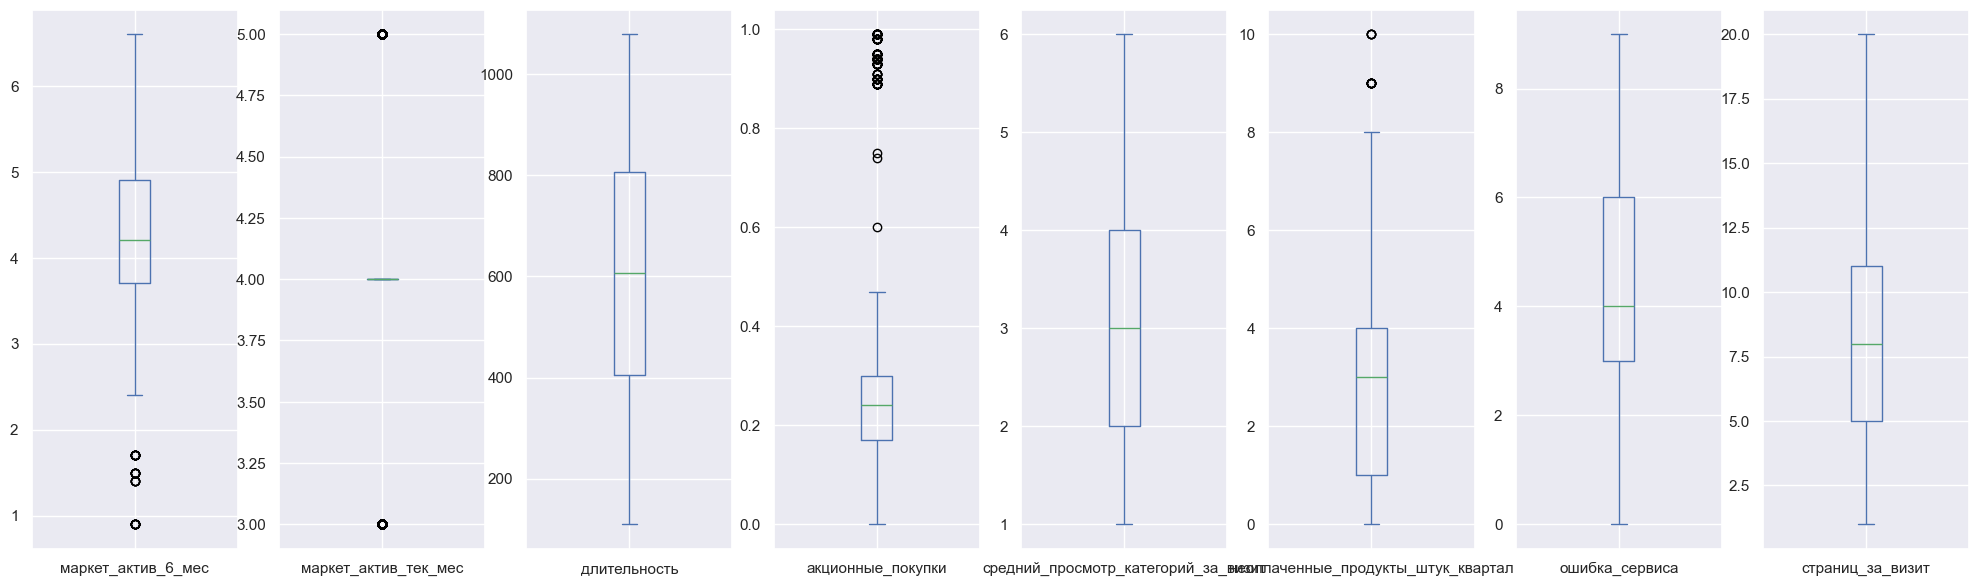

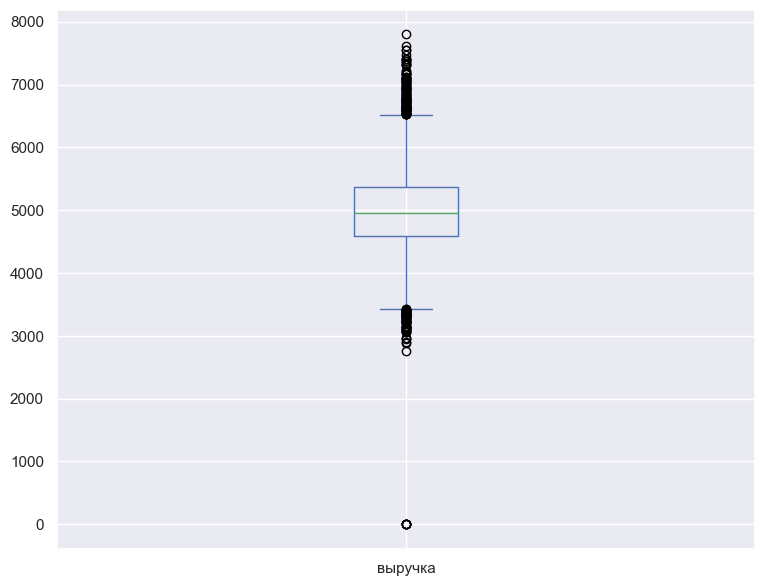

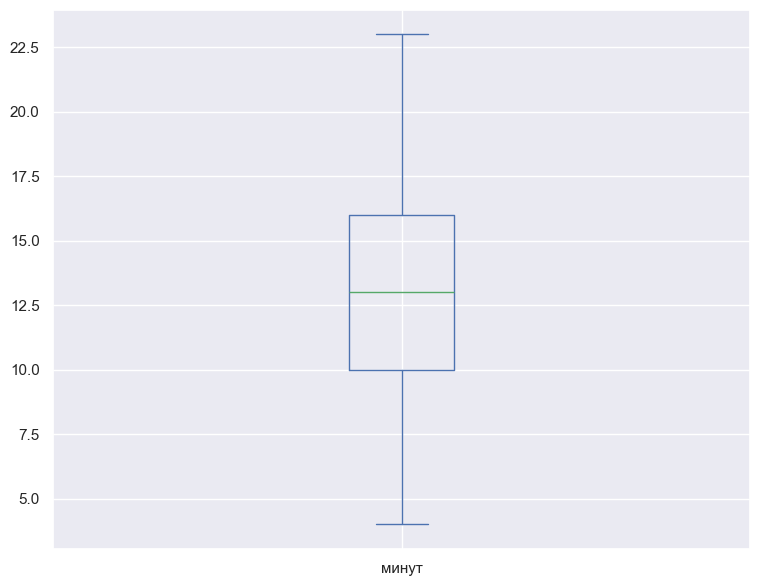

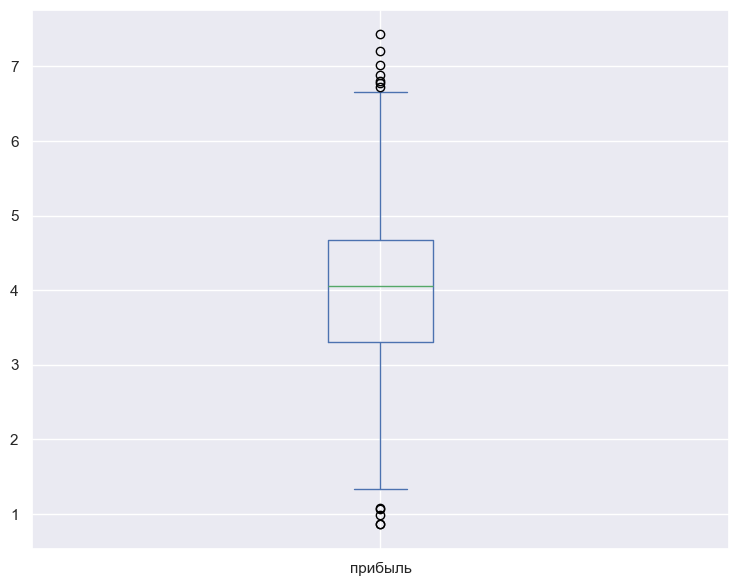

In [19]:
market_file.drop('id', axis=1).plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(25, 7)
)

market_money.drop('id', axis=1).plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(9, 7)
)
market_time.drop('id', axis=1).plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(9, 7)
)
money.drop('id', axis=1).plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(9, 7)
);

У признаков `маркет_актив_6_мес, акционные_покупки, неоплаченные_продукты_штук_квартал, выручка, прибыль` есть выбросы сверху и снизу, следует предположить, что это связано со сферой исследования.

#### **Статистический анализ категориальных признаков**

In [20]:
# Создаем функцию, которая строит столбчатую диаграмму для каждого категориального столбца 
def cat_plot(df):
    for col in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(16,7))
        sns.countplot(x=col, data=df, palette='viridis')
        plt.grid(True, linestyle='--', color='green', alpha=0.2, which='minor')
        plt.minorticks_on()
        plt.tick_params(which='minor')
        plt.xticks(rotation = 25)
        plt.title(f'Признак {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')
        plt.show()

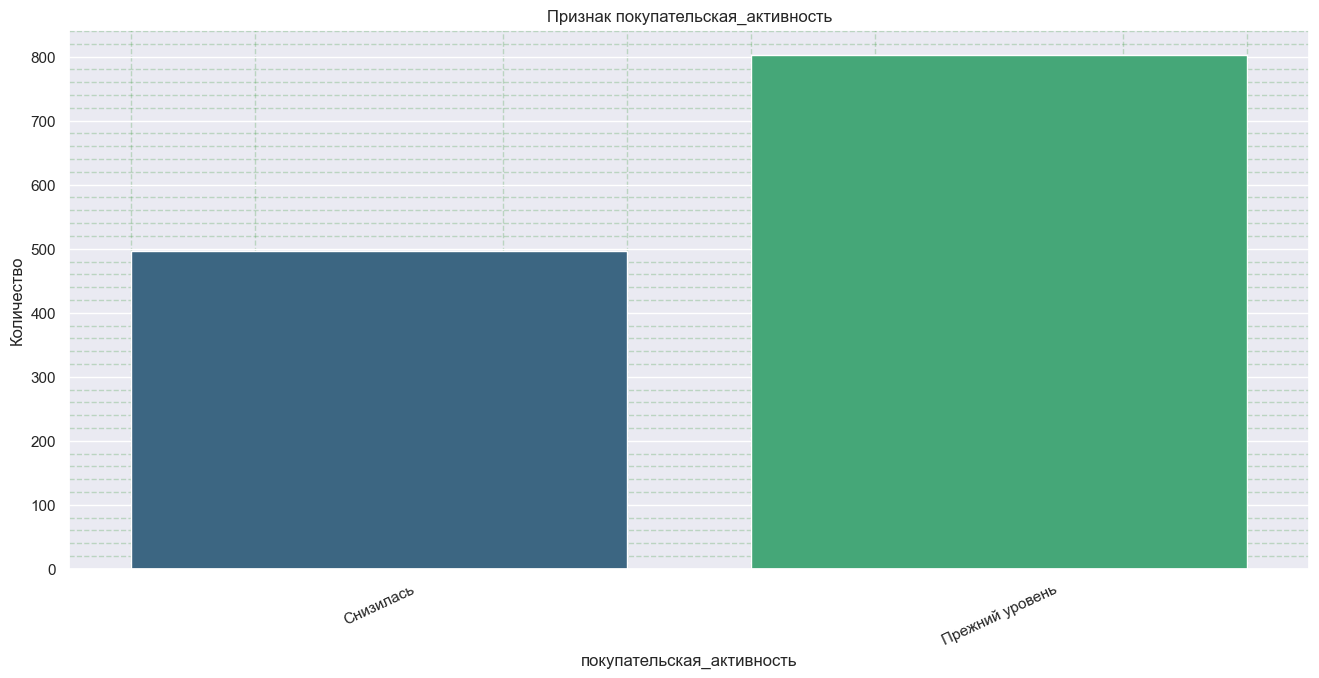

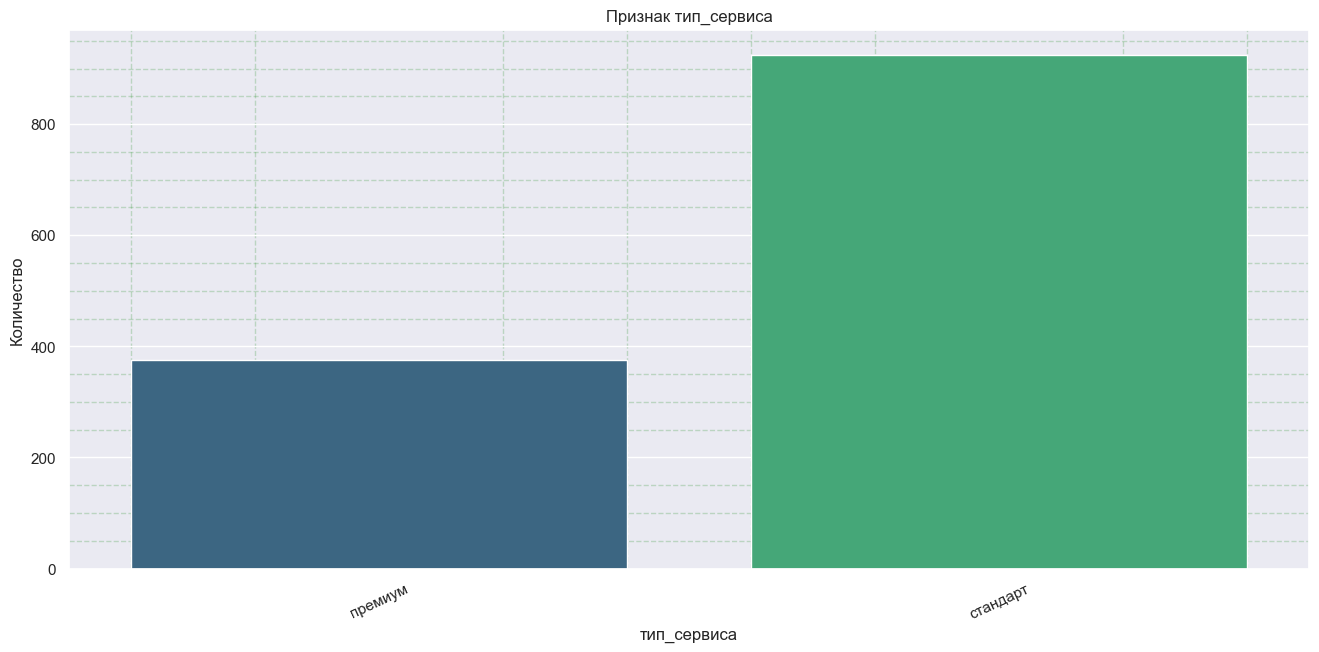

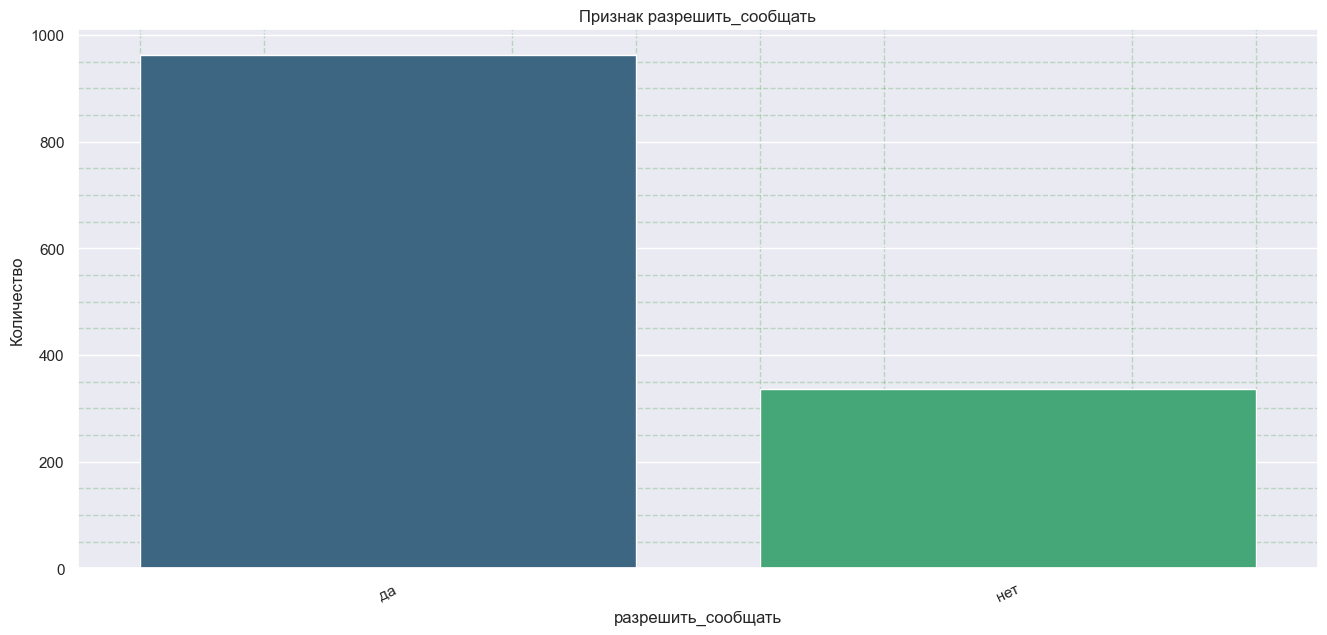

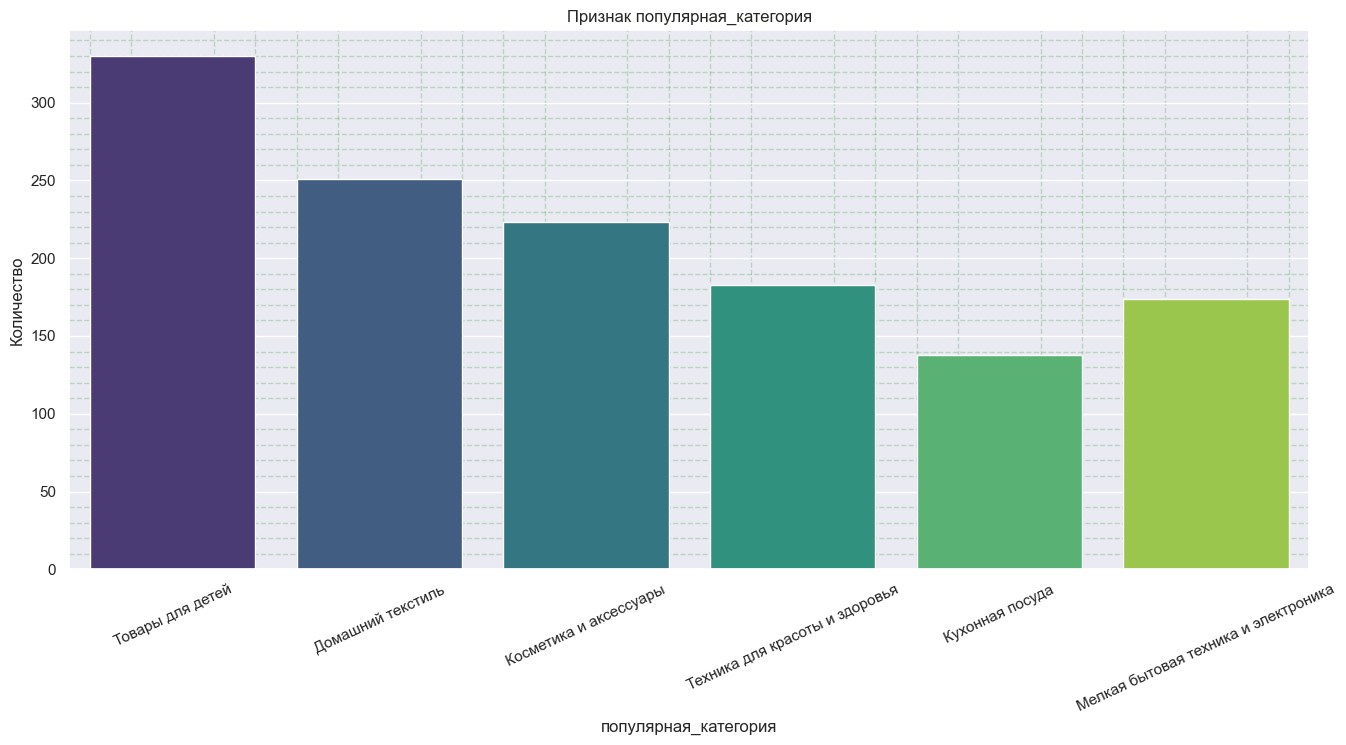

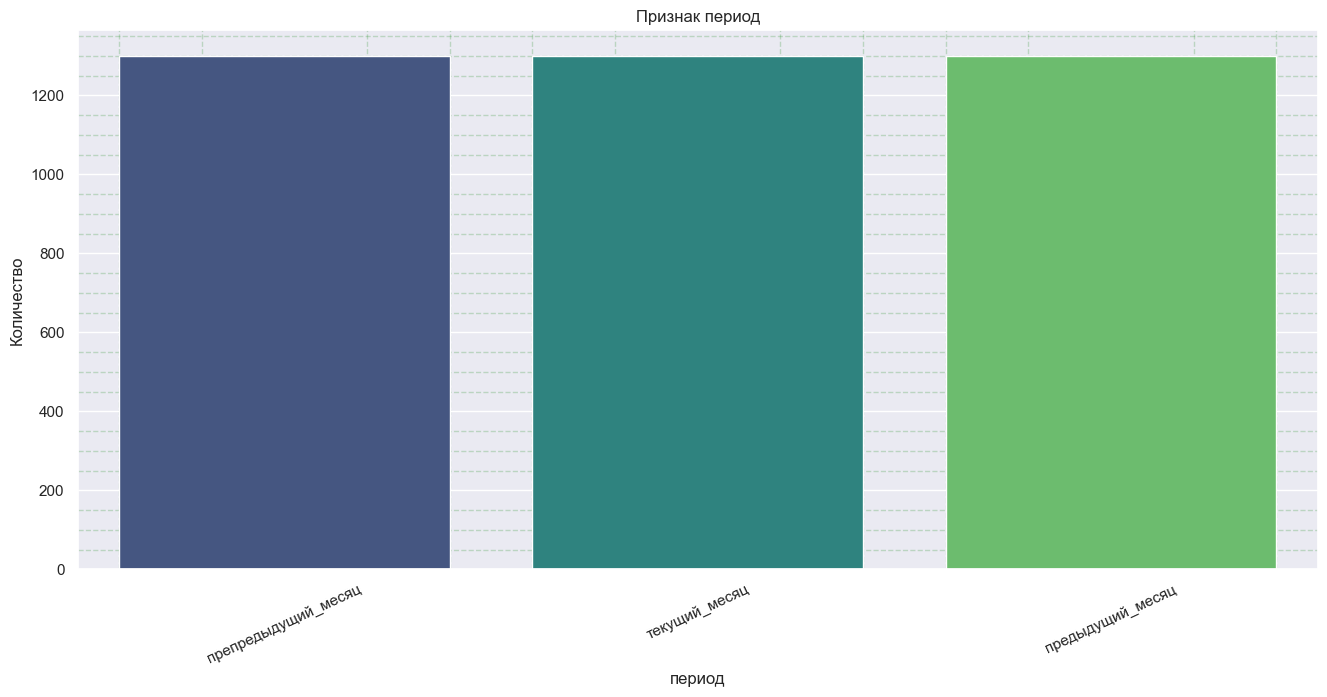

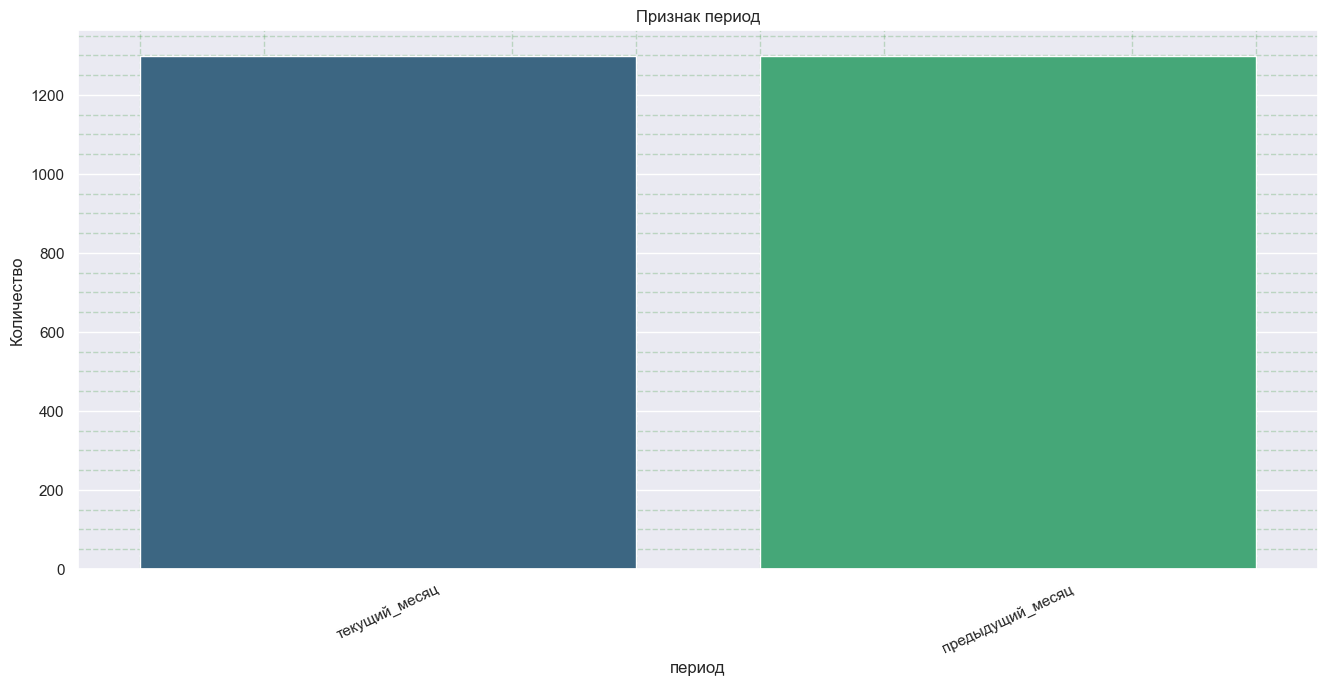

In [21]:
cat_plot(market_file)
cat_plot(market_money)
cat_plot(market_time)
cat_plot(money)

Мы наблюдаем дисбаланс классов в целевом признаке, запомним это и если понадобится применим соответствующие инструменты.

**Отберем клиентов с покупательской активностью не менее трёх месяцев**: признак `выручка` не должен быть равен нулю - иначе покупатель за 3 месяца не делал покупки каждый месяц.

In [22]:
# Отберем клиентов по признаку 'выручка'
ids = market_money[market_money['выручка']== 0]['id'].to_list()
market_money = market_money.query('id not in @ids')
market_file = market_file.query('id not in @ids')
market_time = market_time.query('id not in @ids')
money = money.query('id not in @ids')

**Вывод:** таким образом мы провели анализ количественных и категориальных признаков, отобрали клиентов с покупательской активностью не менее трех месяцев.

### Объединение таблиц
<a id='merge'></a>

In [23]:
# Развернем по id таблицы market_money и market_time
def pivot_id(df):
    df = df.pivot_table(index='id', columns=['период'], aggfunc='first').reset_index()
    df.columns = df.columns.droplevel(0)
    if len(df.columns) == 3:
        df.columns = ['id','предыдущий_месяц_минут','текущий_месяц_минут']
        return df
    else:
        df.columns = ['id','предыдущий_месяц_выручка','препредыдущий_месяц_выручка','текущий_месяц_выручка']
        return df
    
market_money = pivot_id(market_money)
market_time = pivot_id(market_time)

Объединим таблицы `market_file.csv, market_money.csv, market_time.csv`. 

In [24]:
# Объединим таблицы
market = market_money.merge(market_time, on='id')
market = market.merge(market_file, on='id')
# Проверка сохранения данных
print(market_money.shape, market.shape)

(1297, 4) (1296, 18)


In [25]:
market.head(10)

,id,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,5216.0,4472.0,4971.6,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,5457.5,4826.0,5058.4,8,13,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,6158.0,4793.0,6610.4,11,13,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,5807.5,4594.0,5872.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,4738.5,5124.0,5388.5,10,10,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
5,215354,5685.0,4503.0,5869.6,11,12,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесcуары,2,3,7,2
6,215355,3263.0,4749.0,3772.6,12,10,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
7,215356,4146.5,4433.0,4566.4,6,7,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесcуары,2,2,1,3
8,215358,3488.0,4727.0,4209.5,14,10,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4
9,215360,5304.5,5555.0,5834.9,9,6,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7


**Вывод:** таким образом, мы объединили таблицы для дальнейшего исследования.

### **Корреляционный анализ признаков в итоговом датасете**
<a id='corr'></a>

Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками и построим тепловую карту.

In [26]:
# Вычисление матрицы корреляции 
correlation = market.drop('id', axis=1).phik_matrix(interval_cols= ['маркет_актив_6_мес', 'длительность',
                                                    'предыдущий_месяц_выручка','препредыдущий_месяц_выручка',
                                                    'прибыль', 'акционные_покупки', 'текущий_месяц_выручка',
                                                    'предыдущий_месяц_минут', 'текущий_месяц_минут',
                                                    'страниц_за_визит','неоплаченные_продукты_штук_квартал',
                                                    'средний_просмотр_категорий_за_визит','маркет_актив_тек_мес'])
correlation

,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
предыдущий_месяц_выручка,1.000000,0.358313,0.836281,0.126368,0.196789,0.224638,0.000000,0.080842,0.155476,0.051824,0.125572,0.060733,0.252097,0.098440,0.249171,0.000000,0.148410
препредыдущий_месяц_выручка,0.358313,1.000000,0.410478,0.421709,0.342117,0.497393,0.069704,0.000000,0.315331,0.000000,0.113200,0.226381,0.043528,0.176828,0.261016,0.138558,0.339954
текущий_месяц_выручка,0.836281,0.410478,1.000000,0.229351,0.256596,0.197213,0.124216,0.060907,0.039795,0.000000,0.147048,0.071094,0.237240,0.092597,0.230022,0.000000,0.139891
предыдущий_месяц_минут,0.126368,0.421709,0.229351,1.000000,0.410990,0.685138,0.131814,0.038387,0.363950,0.107945,0.026448,0.262324,0.195233,0.159837,0.256632,0.243978,0.478889
текущий_месяц_минут,0.196789,0.342117,0.256596,0.410990,1.000000,0.576770,0.000000,0.000000,0.330601,0.061410,0.101481,0.250558,0.089883,0.182568,0.232383,0.177180,0.382377
покупательская_активность,0.224638,0.497393,0.197213,0.685138,0.576770,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.505655,0.224154,0.749888
тип_сервиса,0.000000,0.069704,0.124216,0.131814,0.000000,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.120027,0.079515,0.102594
разрешить_сообщать,0.080842,0.000000,0.060907,0.038387,0.000000,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.195982,0.021839,0.042134
маркет_актив_6_мес,0.155476,0.315331,0.039795,0.363950,0.330601,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.289421,0.142401,0.396769
маркет_актив_тек_мес,0.051824,0.000000,0.000000,0.107945,0.061410,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.144203,0.116946,0.000000


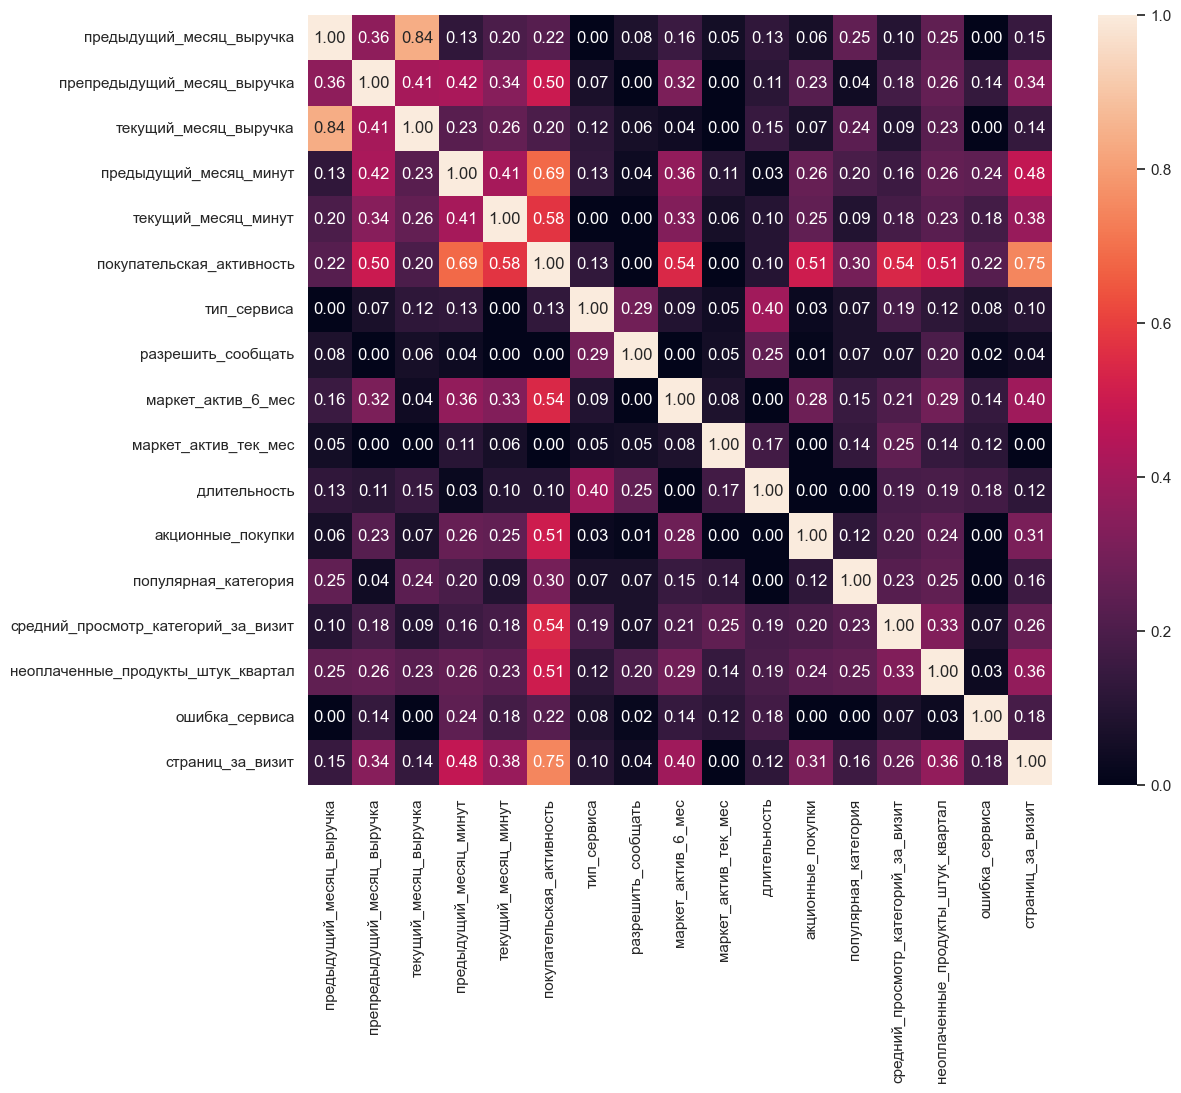

In [27]:
# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f') ;

**Вывод:** мы наблюдаем сильную прямую связь между целевым признаком и `страниц_за_визит`, среднюю прямую связь между целевым и `препредыдущий_месяц_выручка, предыдущий_месяц_минут, текущий_месяц_минут,  маркет_актив_6_мес, акционные_покупки, популярная_категория, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал`, а также слабую прямую связь между целевым и `текущий_месяц_выручка, предыдущий_месяц_выручка, тип_сервиса, длительность, ошибка_сервиса`. Между целевым и признаками `разрешить_сообщать, маркет_актив_тек_мес` связь отсутствует.

**Мультиколлинеарность** между входными признаками **не наблюдается** коэффициент корреляции от 0.9 до 0.95 по модулю отсутствует. 

### **Использование пайплайнов**
<a id='pipline'></a>

Разобьем данные на тестовую и тренировочную выборку. Стратифицируем данные, чтобы тренировочные и тестовые выборки сохранили соотношение классов исходных данных.

In [28]:
X = market.drop(['покупательская_активность','id'], axis=1)
y = market['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

X_train.shape, X_test.shape

((972, 16), (324, 16))

Подготовим данные, количественные и категориальные признаки обработаем в пайплайне.

In [29]:
# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'тип_сервиса','популярная_категория']
ord_columns = ['ошибка_сервиса']
num_columns = ['маркет_актив_6_мес', 'длительность','текущий_месяц_выручка', 'предыдущий_месяц_выручка','препредыдущий_месяц_выручка',
               'акционные_покупки','предыдущий_месяц_минут', 'текущий_месяц_минут', 'страниц_за_визит',
               'неоплаченные_продукты_штук_квартал','средний_просмотр_категорий_за_визит', 'маркет_актив_тек_мес']
# Кодируем категориальные значения
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder( 
         categories=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], 
         handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
# Создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

Создадим словарь для подбора лучших гиперпараметров моделей.

In [30]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__min_samples_split':range(2,5),
        'models__min_samples_leaf':range(1,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели SCV()
    {
        'models':[SVC(probability= True, random_state=RANDOM_STATE)],
        'models__kernel':['linear', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
    
]

Используем один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт нам лучшую модель.

В качестве метрики возьмем ROC-AUC - мы имеем дело с бинарной классификацией, а также объектов с одним значением целевого признака больше, чем с другим.

In [31]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_[0],'\n',
      randomized_search.best_estimator_[1], '\n')
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['разрешить_сообщать', 'тип_сервиса',
                                  'популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_freque...
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['ошибка_сервиса']),
        

In [32]:
result = pd.DataFrame(randomized_search.cv_results_)
with pd.option_context('max_colwidth', None):
    display(result[['rank_test_score', 'param_models', 'mean_test_score','params']]
            .sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
5,1,DecisionTreeClassifier(random_state=42),0.829616,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 4, 'models__max_features': 3, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
6,2,DecisionTreeClassifier(random_state=42),0.824486,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 3, 'models__min_samples_leaf': 2, 'models__max_features': 3, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}"
3,3,DecisionTreeClassifier(random_state=42),0.812600,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 2, 'models__min_samples_leaf': 4, 'models__max_features': 4, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}"
4,4,DecisionTreeClassifier(random_state=42),0.809985,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 3, 'models__min_samples_leaf': 1, 'models__max_features': 4, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}"
8,5,DecisionTreeClassifier(random_state=42),0.784585,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'models__max_features': 4, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
2,6,DecisionTreeClassifier(random_state=42),0.720534,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 3, 'models__max_features': 2, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
7,6,DecisionTreeClassifier(random_state=42),0.720534,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 1, 'models__max_features': 2, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
0,8,DecisionTreeClassifier(random_state=42),0.717162,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 3, 'models__min_samples_leaf': 1, 'models__max_features': 3, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
1,8,DecisionTreeClassifier(random_state=42),0.717162,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 2, 'models__min_samples_leaf': 3, 'models__max_features': 3, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
9,8,DecisionTreeClassifier(random_state=42),0.717162,"{'preprocessor__num': RobustScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 2, 'models__max_features': 3, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"


**Вывод:** лучшая модель имеет следующие параметры: 

**DecisionTreeClassifier**(max_depth=4, max_features=3, min_samples_leaf=4,
                       min_samples_split=4, random_state=42),

а признаки отмасштабированы с помощью StandardScaler(),

метрика roc-auc составляет 0.85 - хороший результат.

###  **Анализ важности признаков**
<a id='importance'></a>

 Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

In [33]:
# Подготовим данные
preprocessor = randomized_search.best_estimator_[0]

encoder = preprocessor.named_transformers_['ohe'].named_steps['ohe']
ohe_columns = encoder.get_feature_names_out(ohe_columns)

all_feature_names = np.concatenate([ohe_columns, ord_columns, num_columns])

X_train_processed = preprocessor.transform(X_train)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)

X_test_processed = preprocessor.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

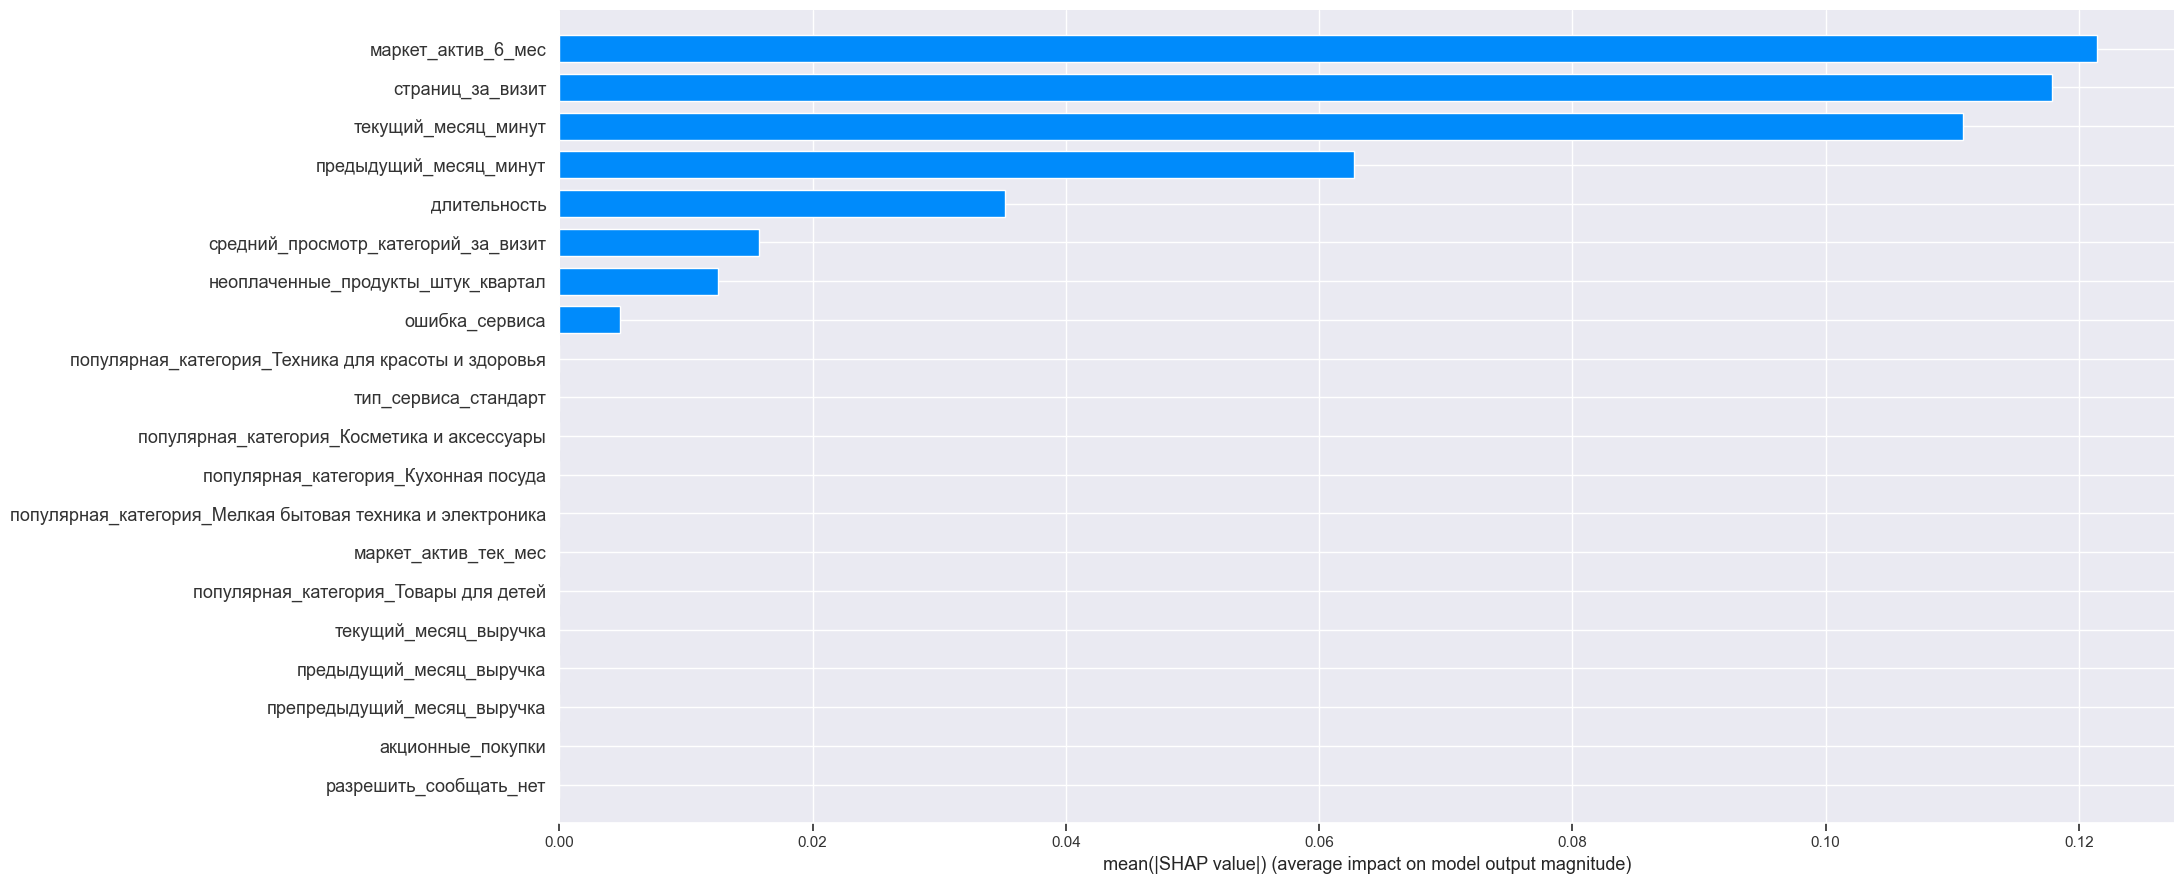

In [34]:
# Построим график важности с помощью метода SHAP.
model = randomized_search.best_estimator_[1]
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_processed_df)[:, :, 1]
shap.summary_plot(shap_values,X_test_processed_df, plot_type="bar", plot_size=(22, 9))

**Вывод:** признаки `препредыдущий_месяц_выручка, , популярная_категория_Товары для детей, популярная_категория_Товары для красоты и здоровья, популярная_категория_Мелкая бытовая техника и электроника, маркет_актив_тек_мес, популярная_категория_Косметика и аксессуары, популярная_категория_Домашний текстиль, тип_сервиса_стандарт, тип_сервиса_премимум, разрешить_сообщать_нет, популярная_категория_Кухонная посуда` мало значимы для модели.


Признаки `маркет_актив_6_мес, страниц_за_визит, текущий_месяц_минут, предудыщий_месяц_минут, длительность, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, ошибка_сервиса`сильнее всего влияют на целевой признак.


При моделировании можно не учитывать мало значимые признаки, а также обратить внимание на мало значимые признаки при принятии бизнес-решений и не вкладывать в них ресурсы.

### **Сегментация покупателей**
<a id='segment'></a>

Выполним сегментацию покупателей, используя результаты моделирования и данные о прибыльности покупателей.

In [35]:
# Выделим вероятности снижения покупательской активности
probas = np.array(randomized_search.predict_proba(X)[:,1])
probas = pd.DataFrame(probas, columns = ['вероятность'])

In [36]:
# Создадим датафрейм с прибылью и вероятностями
general = money.join(probas, how='left')
# Создаем общий датафрейм для исследования
general = general.merge(market, on='id')
general.shape, market.shape

((1296, 20), (1296, 18))

Проведем графический анализ: построим зависимость прибыли от вероятности снижения.

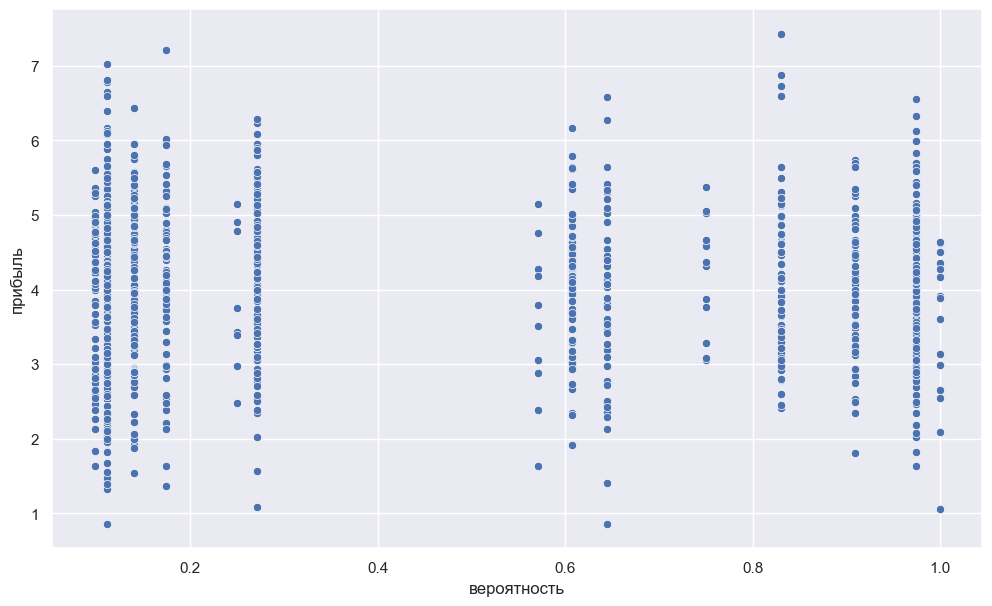

In [37]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=general, x='вероятность', y='прибыль');

Мы наблюдаем две группы клиентов: с вероятностью снижения активности меньше 0.4 и с вероятностью больше 0.6.

Возьмем для исследования покупателей с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. 

In [41]:
# Исключаем низкую вероятность снижения покупательской активности
segment = general.query('вероятность >=0.6 and прибыль >=5')
other_clients = general.query('вероятность <0.6 and прибыль <5')

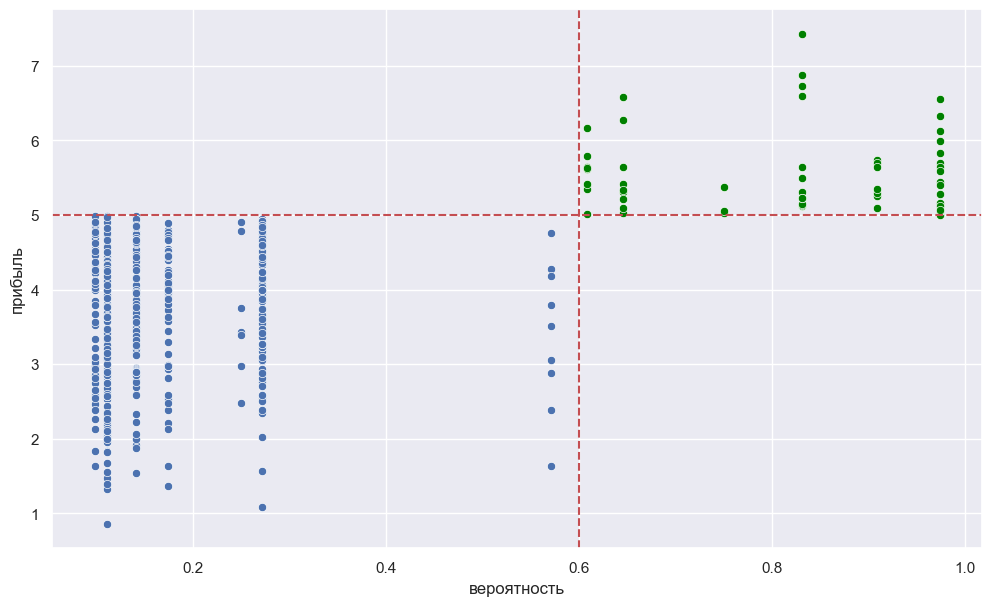

In [42]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=segment, x='вероятность', y='прибыль', color='green')
sns.scatterplot(data=other_clients, x='вероятность', y='прибыль')
plt.axvline(x=0.6, color='r', linestyle='--')
plt.axhline(y=5, color='r', linestyle='--');

Отберем группу клиентов, которые покупают товары из раздела "Товары для детей".

In [43]:
child_category = segment.query('популярная_категория == "Товары для детей"')

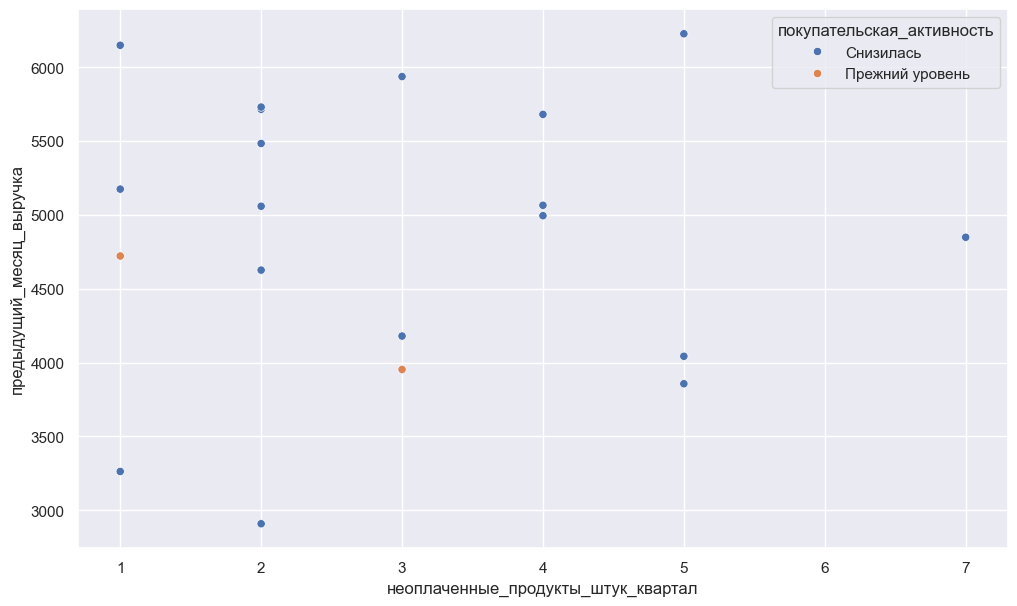

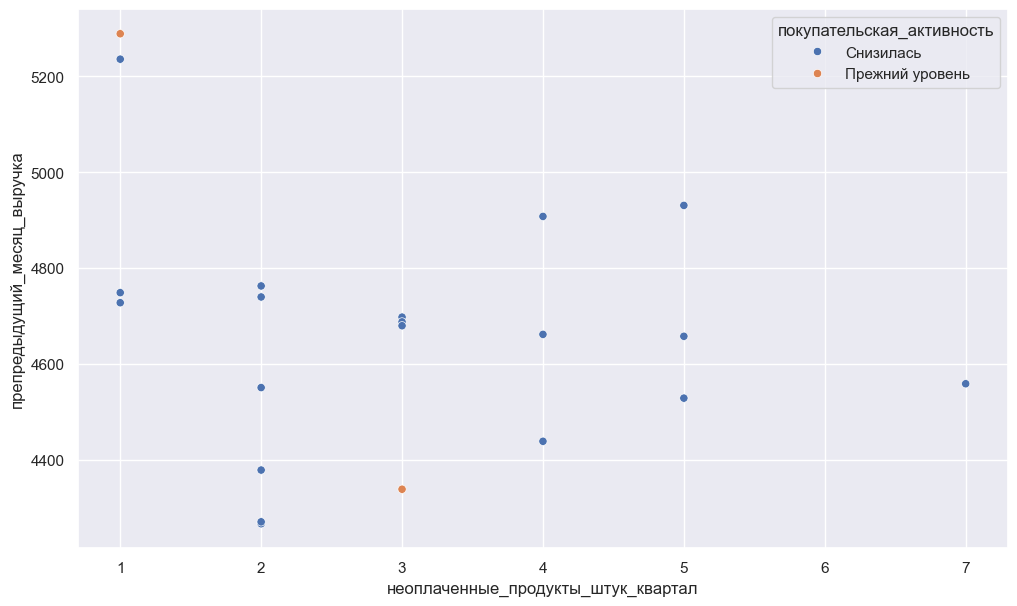

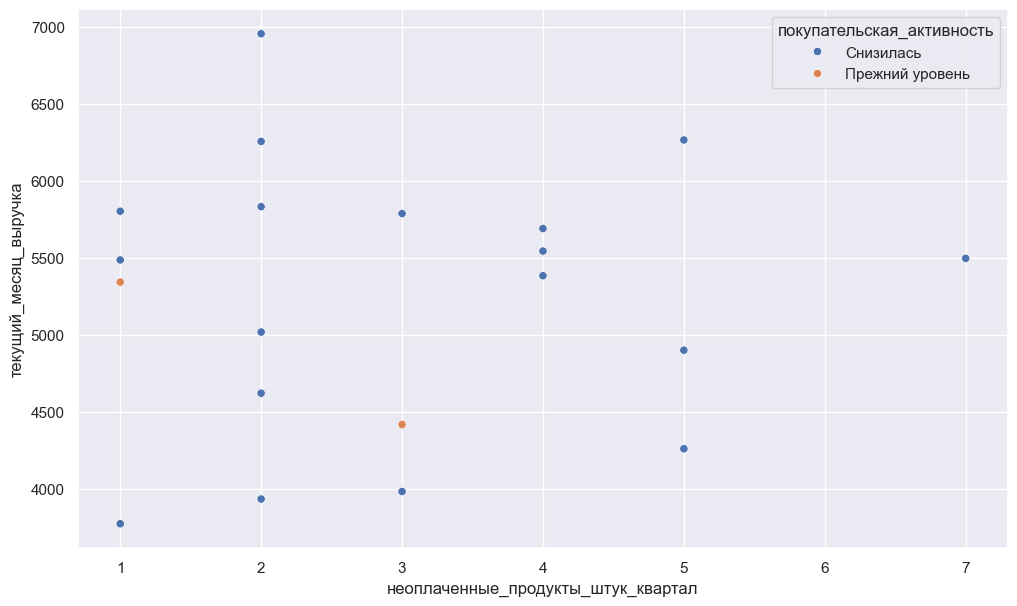

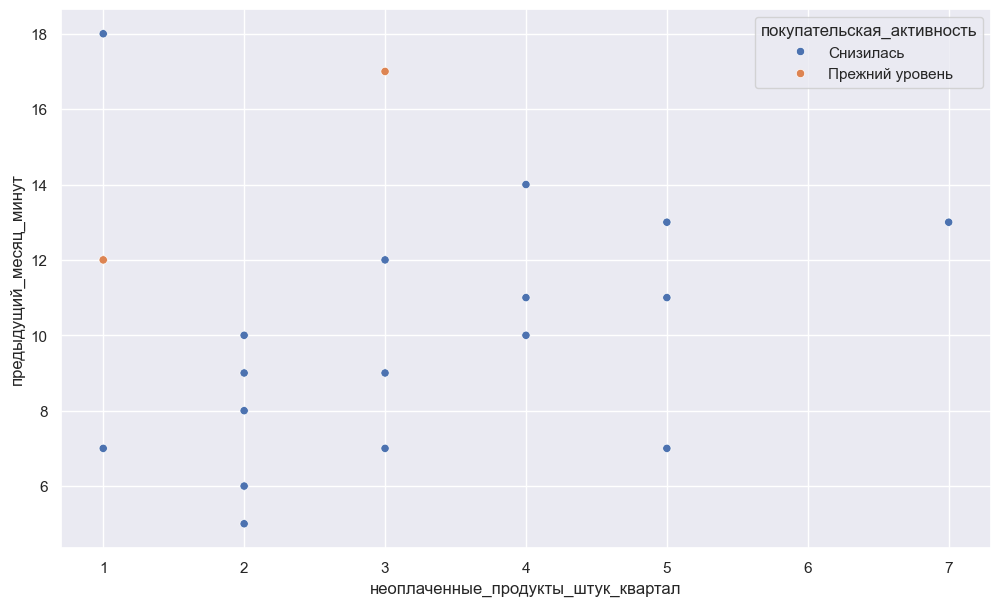

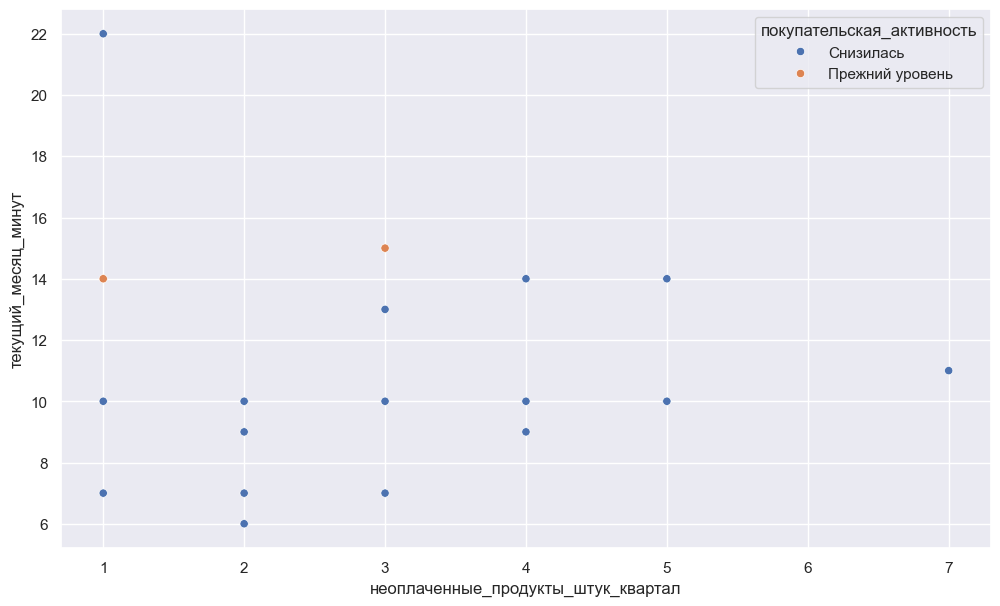

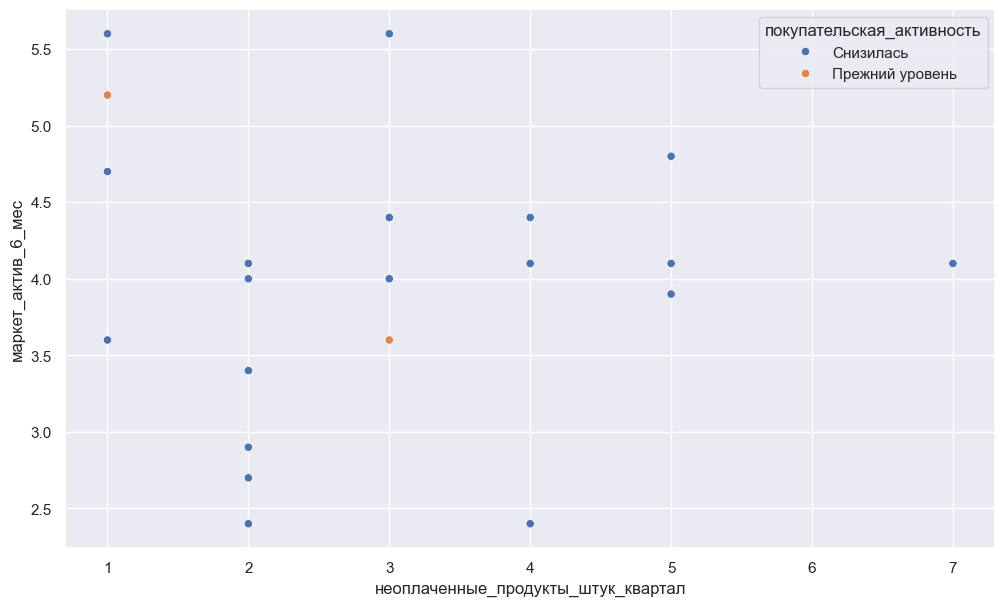

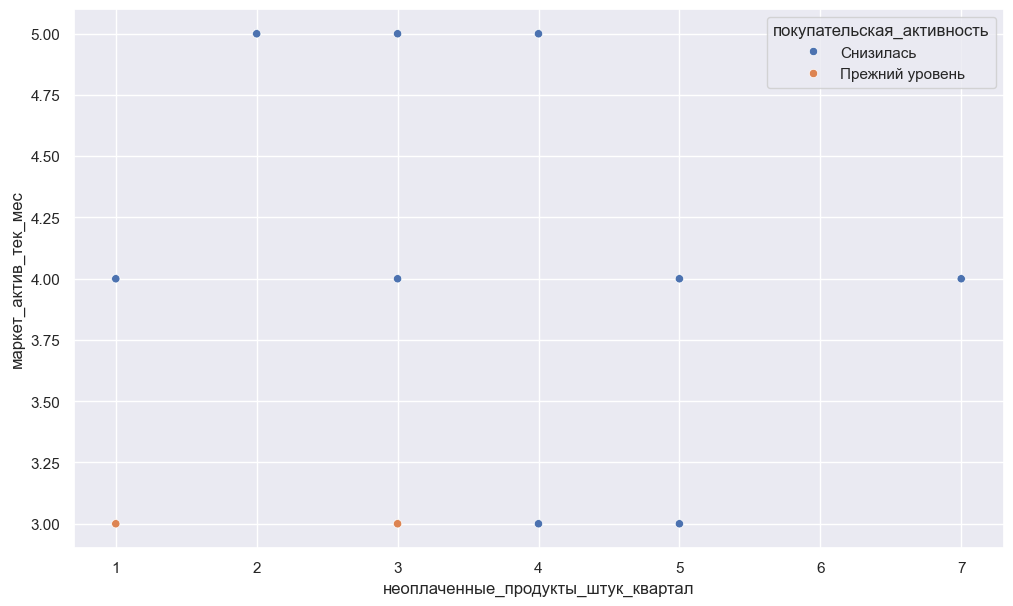

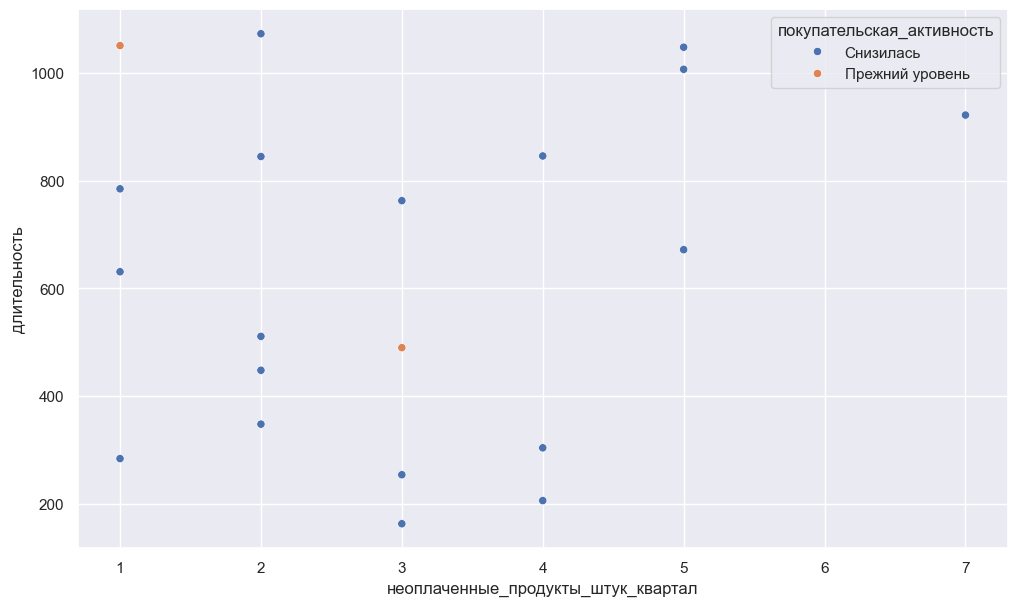

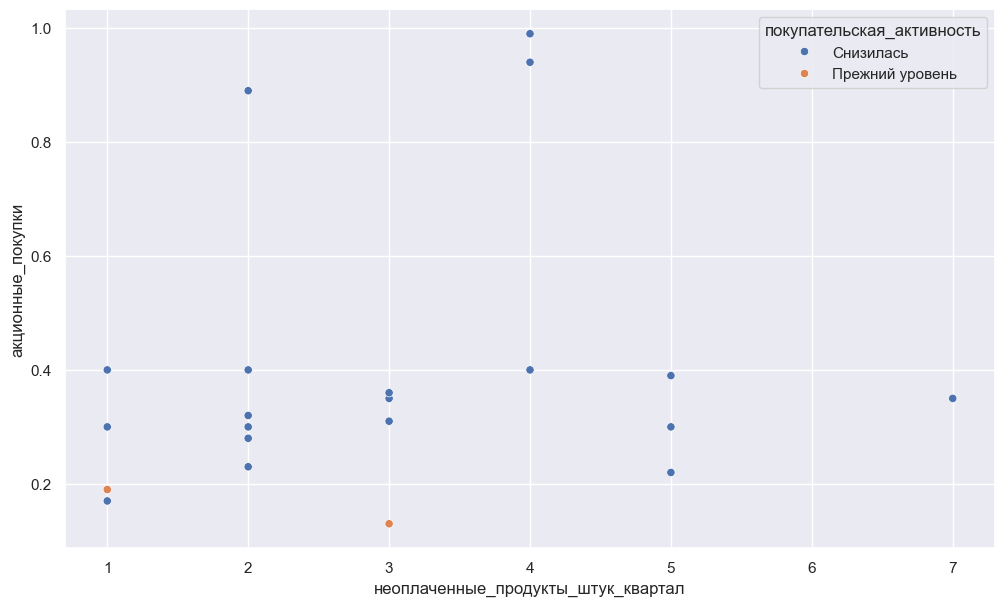

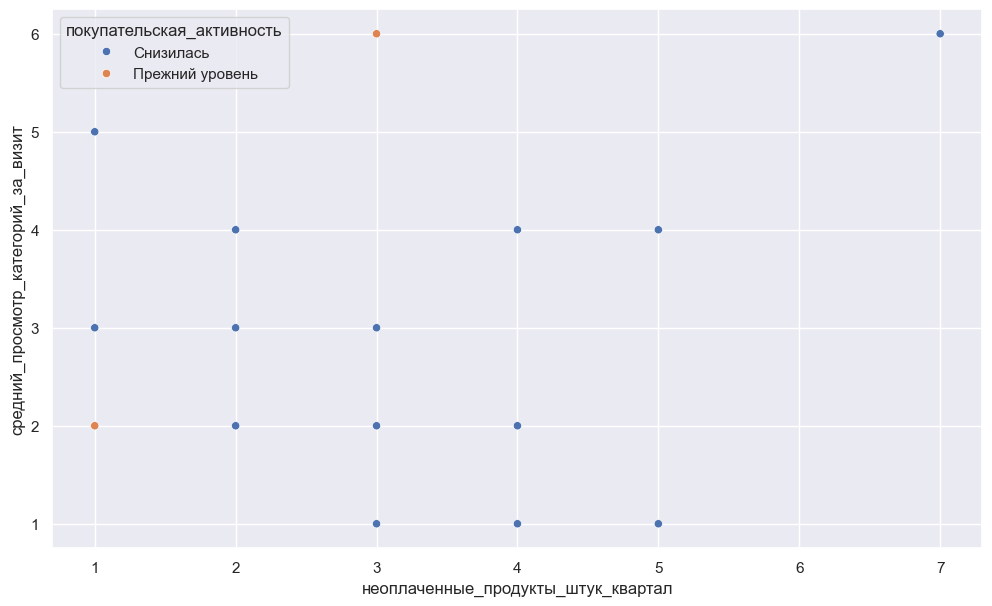

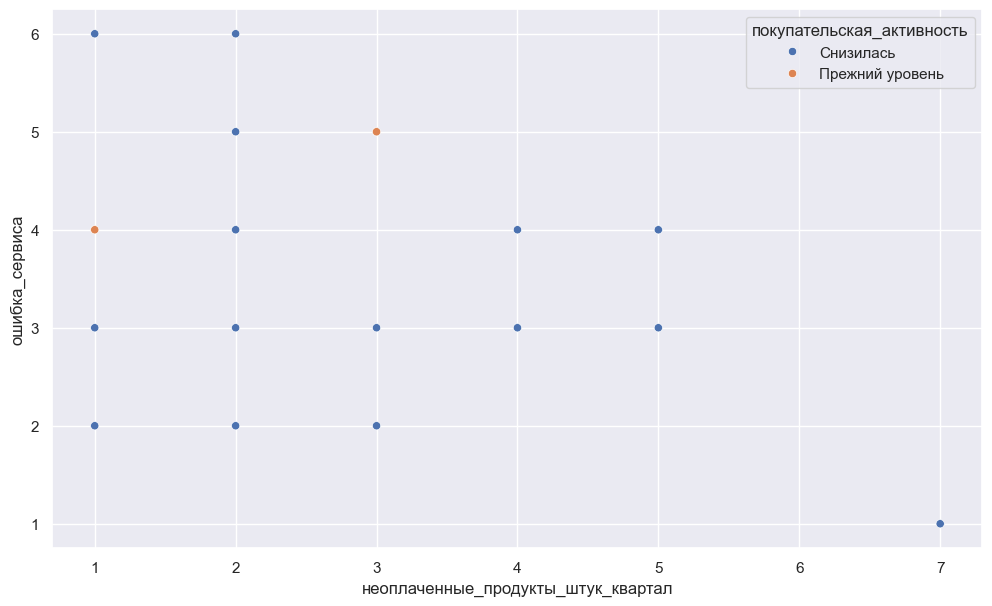

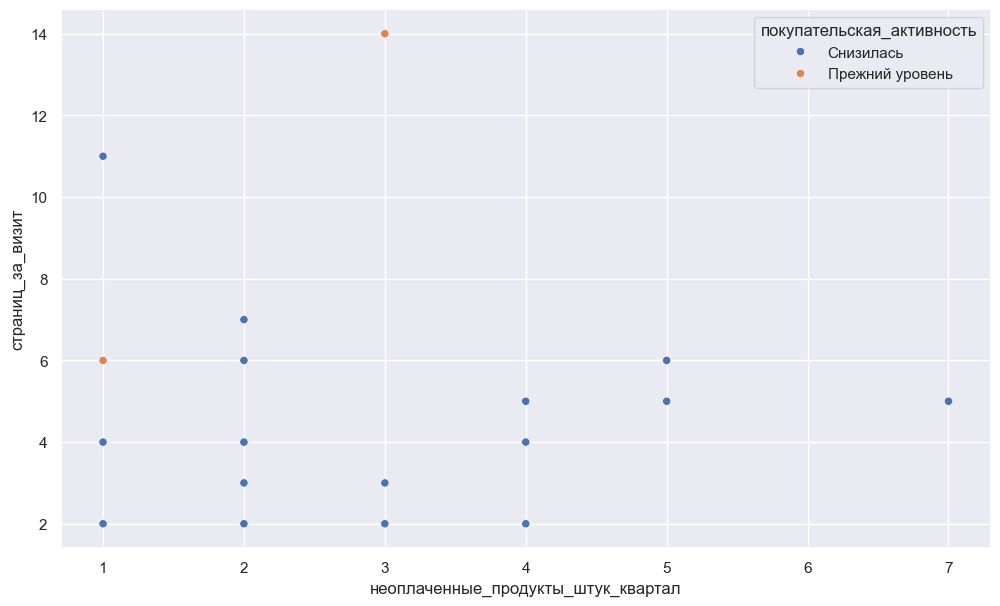

In [44]:
for col in child_category.select_dtypes(include=['int','float']).columns:
        if col not in ['id','прибыль', 'неоплаченные_продукты_штук_квартал', 'вероятность']:
            plt.figure(figsize=(12,7))
            sns.scatterplot(data=child_category, x='неоплаченные_продукты_штук_квартал', y=col, hue='покупательская_активность');

**Вывод:** 

Чем меньше неоплаченных продуктов в корзине, тем больше среднемесячное значение маркетинговых коммуникаций компании, выручка, количество акционных покупок и минут, проведенных на сайте;

Со снижением покупательской активности идет спад количества проведенных минут на сайте и увеличение количества неоплаченных продуктов в корзине;

При больших значениях ошибок сервиса покупательская активность снижается;

Чем меньше посещенных страниц за визит и маркетинговых коммуникаций, тем ниже покупательская активность;

Чем меньше акционных покупок, тем выше покупательская активность.


**Предложения для бизнеса:** 

- Обратить внимание на маркетинговые коммуникации, сделать больше предложений в категориии `Товары для детей`;

- Сделать более комфортным сайт с завлекающим дизайном, чтобы увеличить количество проведенных минут на сайте;

- Поработать над бесперебойной работой сайта, снизить количество ошибок;

- Уменьшить количество акционных предложений в категории `Товары для детей`, сделать частичную предоплату за товары в корзине, чтобы повысить выкуп продуктов.


### **Итоговые выводы**
<a id='final'></a>

Таким образом мы создали модель машинного обучения для интернет-магазина "В один клик" и выполнили следующие цели:

1. Построили модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца;
2. Включили дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца;
3. Используя данные модели и данные о прибыльности клиентов, выделили сегменты покупателей и разработали для них персонализированные предложения.


Для этого были выполнены следующие действия:

- **Открыты файлы** с данными и изучена общая информация: 

**`market_file.csv`** содержит **1300 строк и 13 столбцов**.

**`market_money.csv`** содержит **3900 строк и 3 столбца**.

**`market_time.csv`** содержит **2600 строк и 3 столбца**.

**`money.csv`** содержит **1300 строк и 2 столбца**.

В данных присутствовали неправильные названия столбцов, пропуски отсутствовали, типы данных корректны.


- Выполнена **предобработка данных:**
    
    переименовали названия столбцов в нижний регистр;
    
    проверили данные на пропущенные значения и не обнаружили;
    
    изучили неявные и явные дубликаты и устранили.


- Провели **исследовательский анализ данных:**

  избавились от аномальных значений и посмотрели на распределение количественных признаков;
  
  проанализировали категориальные признаки.
  

- Построили лучшую модель:

    использовали один общий пайплайн для всех моделей и инструмент подбора гиперпараметров RandomizedSearchCV, который вернул нам лучшую модель со следующими характеристиками: 
    
    **DecisionTreeClassifier**(max_depth=4, max_features=3, min_samples_leaf=4,
                       min_samples_split=4, random_state=42),

    а признаки отмасштабированы с помощью StandardScaler(),

    метрика roc-auc составляет 0.85.
    


    
**Рекомендации для бизнеса:** 

- Обратить внимание на маркетинговые коммуникации, сделать больше предложений в категориии `Товары для детей`;

- Сделать более комфортным сайт с завлекающим дизайном, чтобы увеличить количество проведенных минут на сайте;

- Поработать над бесперебойной работой сайта, снизить количество ошибок;

- Уменьшить количество акционных предложений в категории `Товары для детей`, сделать частичную предоплату за товары в корзине, чтобы повысить выкуп продуктов.


